## 敘述統計 - 整體分析
- 前置作業: 執行data_preprocessing.ipynb 檔案

In [1]:
# 敘述統計分析(不包含評論內容)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 載入中文字體
import matplotlib.font_manager as fm

# 設定字體（微軟正黑）
font_path = "C:/Windows/Fonts/msjh.ttc"  # 字體路徑
font_prop = fm.FontProperties(fname=font_path)

plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['axes.unicode_minus'] = False

import warnings
warnings.filterwarnings("ignore")

### 低於100 則評論的

In [71]:
# 讀取含平均評分與評分數資料
new_basic_info_avg_rating_count_838 = pd.read_csv('../data/838-new_basic_info_avg_rating_count.csv')
new_basic_info_avg_rating_count_838.head()

,location_id,gmap_location,attraction_type,address,avg_score,rating_count,avg_nlp
0,0x346885034084ae89:0x59a8b1eac5731c29,白楊步道水簾洞,自然景觀與戶外,花蓮縣,4.762067,2942,49.264338
1,0x345d4f79d991ebff:0x4b31be352c6025d8,八斗子海濱公園,自然景觀與戶外,基隆市,4.403774,1060,68.848485
2,0x345d436e06bbbaa1:0xc19904956774fbda,龍洞四季灣海泳區,自然景觀與戶外,新北市,4.112676,142,49.229167
3,0x3469101487645db9:0x3d4456455bc12054,張連昌薩克斯風,人文歷史,台中市,4.528851,1993,55.607567
4,0x34691b0ca6f85609:0x402270c976dab396,石岡水壩,城市景觀,台中市,4.404348,1610,54.721311


In [72]:
# 評論數篩選器 找低於100的
rating_count_filter = new_basic_info_avg_rating_count_838['rating_count'] < 100
new_basic_info_avg_rating_count_838 = new_basic_info_avg_rating_count_838[rating_count_filter]
print(rating_count_filter[rating_count_filter == True].count())


62


address
澎湖縣    15
台北市     7
南投縣     5
花蓮縣     4
連江縣     3
金門縣     3
宜蘭縣     3
嘉義縣     3
雲林縣     3
彰化縣     2
新北市     2
苗栗縣     2
台中市     2
台南市     2
桃園市     2
高雄市     1
台東縣     1
基隆市     1
嘉義市     1
Name: count, dtype: int64


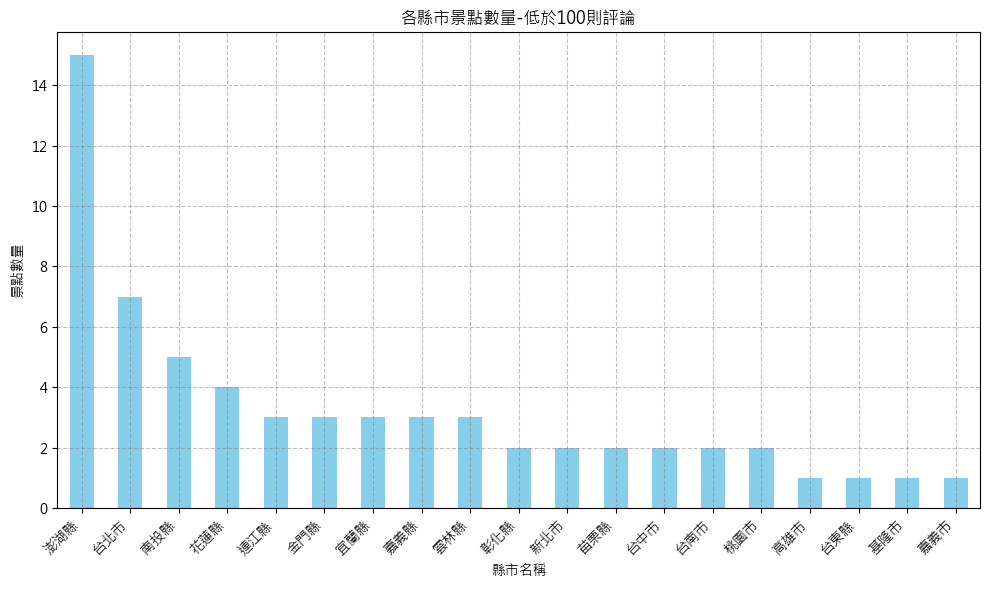

In [73]:
# 計算22個縣市景點數量
city_counts_under_100 = new_basic_info_avg_rating_count_838['address'].value_counts()
print(city_counts_under_100)

# 調整圖表基本設定
city_counts_under_100.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.xlabel('縣市名稱')
plt.ylabel('景點數量')
plt.title('各縣市景點數量-低於100則評論')

# 旋轉縣市名稱標籤，使其易於閱讀。
plt.xticks(rotation=45, ha='right')
plt.grid(linestyle='--',color='gray', alpha=0.5)

# 自動調整文字間距
plt.tight_layout()
plt.show()

### 大於100則評論的

In [21]:
# 讀取含平均評分與評分數資料
new_basic_info_avg_rating_count_838 = pd.read_csv('../data/838-new_basic_info_avg_rating_count.csv')
new_basic_info_avg_rating_count_838.head()

,location_id,gmap_location,attraction_type,address,avg_score,rating_count,avg_nlp
0,0x346885034084ae89:0x59a8b1eac5731c29,白楊步道水簾洞,自然景觀與戶外,花蓮縣,4.762067,2942,49.264338
1,0x345d4f79d991ebff:0x4b31be352c6025d8,八斗子海濱公園,自然景觀與戶外,基隆市,4.403774,1060,68.848485
2,0x345d436e06bbbaa1:0xc19904956774fbda,龍洞四季灣海泳區,自然景觀與戶外,新北市,4.112676,142,49.229167
3,0x3469101487645db9:0x3d4456455bc12054,張連昌薩克斯風,人文歷史,台中市,4.528851,1993,55.607567
4,0x34691b0ca6f85609:0x402270c976dab396,石岡水壩,城市景觀,台中市,4.404348,1610,54.721311


In [22]:
# 評論數篩選器
rating_count_filter = new_basic_info_avg_rating_count_838['rating_count'] > 100
new_basic_info_avg_rating_count_838 = new_basic_info_avg_rating_count_838[rating_count_filter]
print(rating_count_filter[rating_count_filter == True].count())

776


## 單維度分析

### 單點分析

     avg_score
0     4.762067
1     4.403774
2     4.112676
3     4.528851
4     4.404348
..         ...
833   4.237209
834   4.658248
835   4.653728
836   4.671154
837   4.341719

[776 rows x 1 columns]


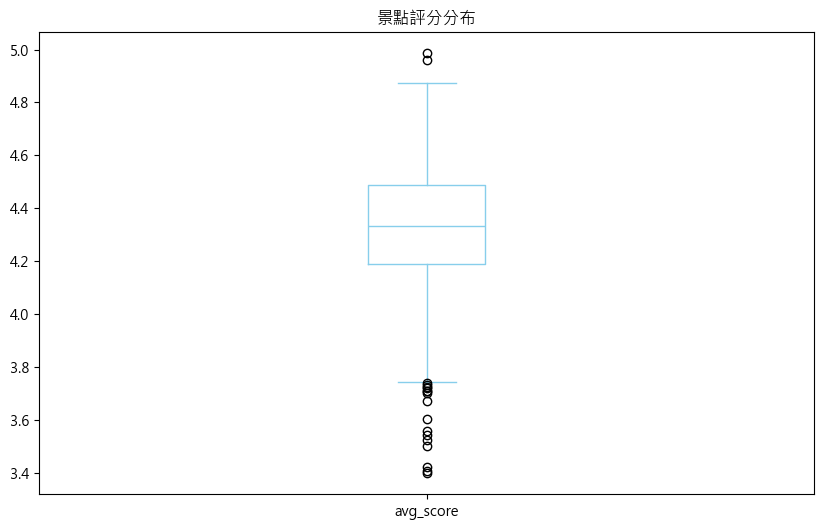

In [23]:
# 平均評分圖
# 各景點平均分數
avg_rating_all = new_basic_info_avg_rating_count_838[['avg_score']]
print(avg_rating_all)

# 畫圖
avg_rating_all.plot(kind='box', figsize=(10, 6), color='skyblue')
plt.title('景點評分分布')

plt.show()

       avg_nlp
0    49.264338
1    68.848485
2    49.229167
3    55.607567
4    54.721311
..         ...
833  51.301587
834  61.155262
835  63.860731
836  51.304833
837  58.995833

[776 rows x 1 columns]


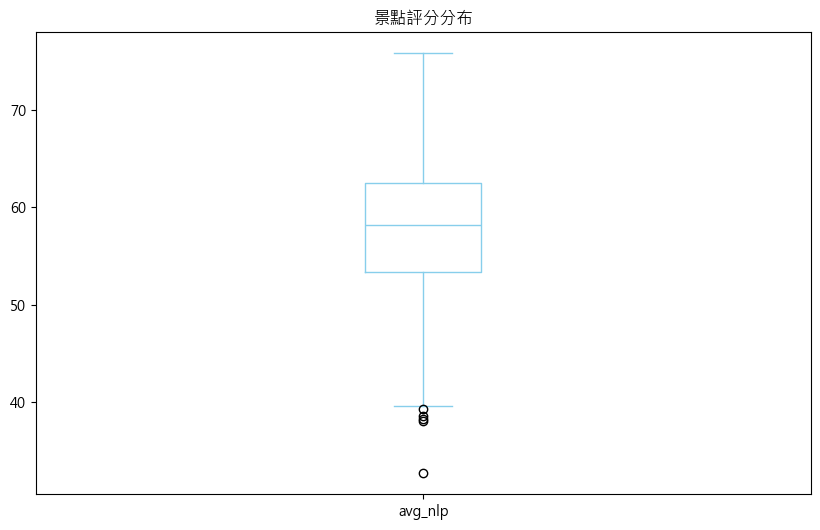

In [24]:
# 平均情感分數圖
# 各景點平均情感分數
avg_nlp_all = new_basic_info_avg_rating_count_838[['avg_nlp']]
print(avg_nlp_all)

# 畫圖
avg_nlp_all.plot(kind='box', figsize=(10, 6), color='skyblue')
plt.title('景點評分分布')

plt.show()

### 各縣市景點總數

address
新北市    76
台北市    72
高雄市    60
台南市    56
南投縣    55
花蓮縣    45
台東縣    45
台中市    45
屏東縣    41
苗栗縣    32
桃園市    32
彰化縣    31
宜蘭縣    29
澎湖縣    26
嘉義縣    25
新竹縣    24
基隆市    19
連江縣    18
金門縣    15
新竹市    10
雲林縣    10
嘉義市    10
Name: count, dtype: int64


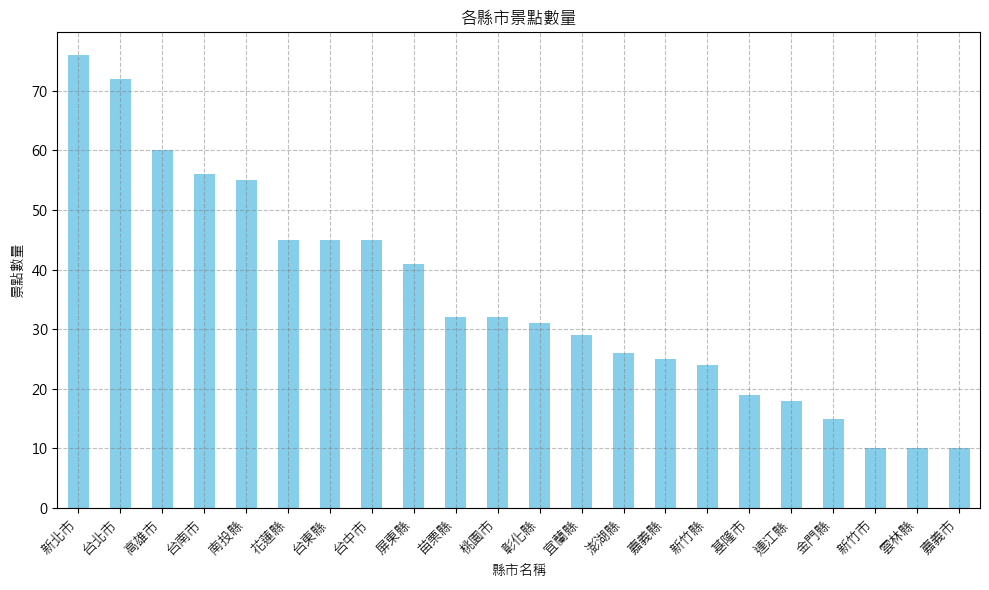

In [69]:
# 計算22個縣市景點數量
city_counts = new_basic_info_avg_rating_count_838['address'].value_counts()
print(city_counts)

# 調整圖表基本設定
city_counts.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.xlabel('縣市名稱')
plt.ylabel('景點數量')
plt.title('各縣市景點數量')

# 旋轉縣市名稱標籤，使其易於閱讀。
plt.xticks(rotation=45, ha='right')
plt.grid(linestyle='--',color='gray', alpha=0.5)

# 自動調整文字間距
plt.tight_layout()
plt.show()

### 各縣市平均評分

address
澎湖縣    4.467963
金門縣    4.463522
台北市    4.403343
連江縣    4.378915
南投縣    4.373846
宜蘭縣    4.365095
嘉義市    4.326447
新北市    4.321920
台中市    4.320048
花蓮縣    4.313103
新竹市    4.308913
雲林縣    4.305166
屏東縣    4.304112
台南市    4.296586
高雄市    4.284739
基隆市    4.283565
台東縣    4.280180
彰化縣    4.278707
桃園市    4.240891
嘉義縣    4.233094
新竹縣    4.229346
苗栗縣    4.158831
Name: avg_score, dtype: float64


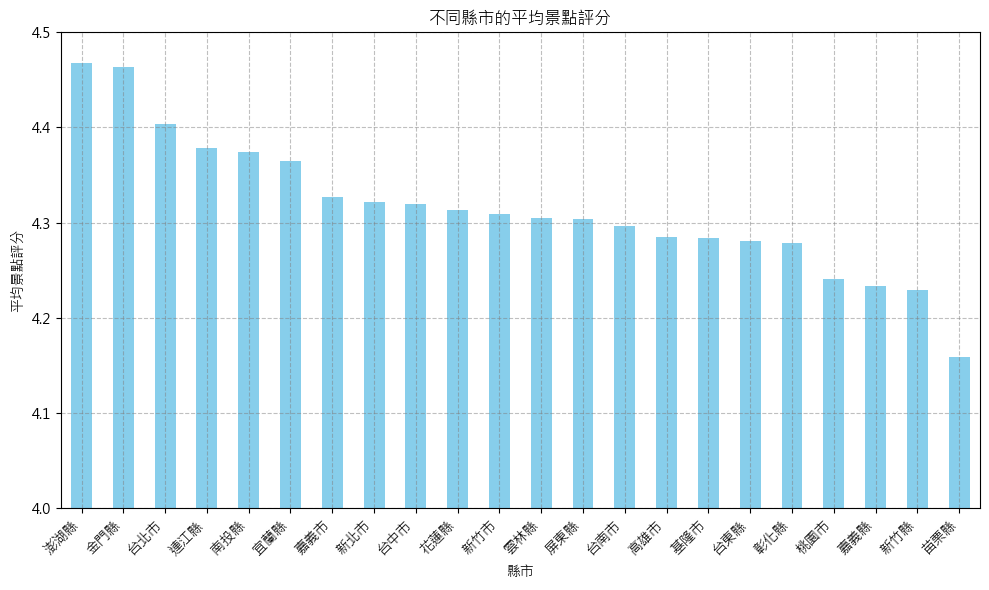

In [68]:
# 縣市平均評分
city_groups = new_basic_info_avg_rating_count_838.groupby('address')['avg_score'].mean().sort_values(ascending=False)
print(city_groups)

# 畫圖
city_groups.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.xlabel('縣市')
plt.ylabel('平均景點評分')
plt.title('不同縣市的平均景點評分')

# 旋轉縣市名稱標籤 使其易於閱讀
plt.xticks(rotation=45, ha='right')
plt.yticks([4.0, 4.1, 4.2, 4.3, 4.4, 4.5])
plt.grid(linestyle='--',color='gray', alpha=0.5)
plt.ylim(4,4.5)

# 自動調整文字間距
plt.tight_layout()

plt.show()

### 各縣市平均情感分數

address
澎湖縣    60.782045
南投縣    59.535524
嘉義市    58.990211
高雄市    58.609153
桃園市    58.514030
嘉義縣    58.430697
新北市    58.136927
花蓮縣    58.111797
台中市    57.961220
宜蘭縣    57.875388
台東縣    57.567699
新竹縣    57.470965
苗栗縣    57.298716
屏東縣    57.295471
台南市    57.211999
彰化縣    57.136049
台北市    56.883756
新竹市    56.586957
雲林縣    56.013717
連江縣    54.935174
基隆市    54.524035
金門縣    53.844841
Name: avg_nlp, dtype: float64


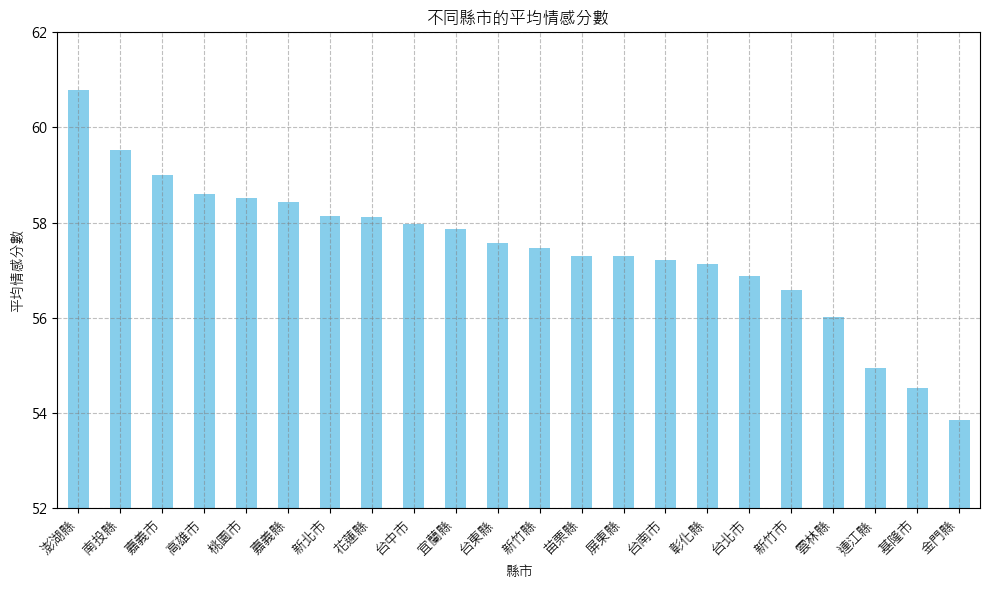

In [67]:
# 縣市平均情感分數
nlp_city_groups = new_basic_info_avg_rating_count_838.groupby('address')['avg_nlp'].mean().sort_values(ascending=False)
print(nlp_city_groups)

# 畫圖
nlp_city_groups.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.xlabel('縣市')
plt.ylabel('平均情感分數')
plt.title('不同縣市的平均情感分數')

# 旋轉縣市名稱標籤 使其易於閱讀
plt.xticks(rotation=45, ha='right')
plt.grid(linestyle='--',color='gray', alpha=0.5)
plt.ylim(52, 62)

# 自動調整文字間距
plt.tight_layout()

plt.show()

### 縣市評分情感並列

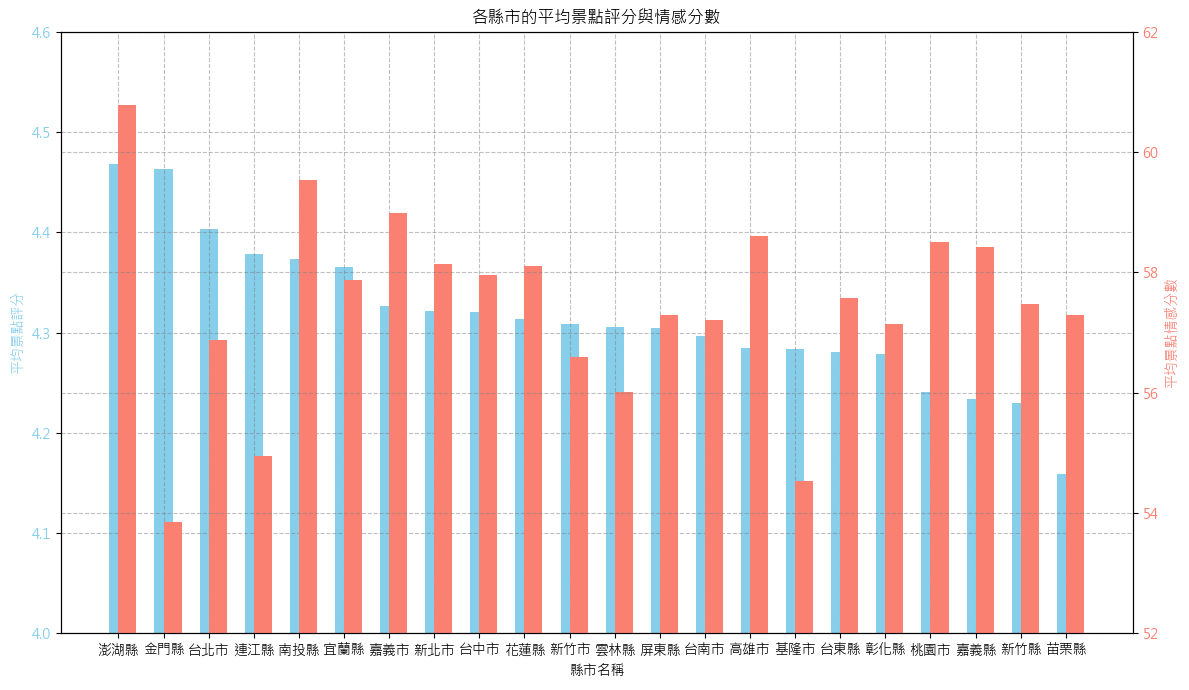

In [28]:
# 畫圖
fig, ax1 = plt.subplots(figsize=(12, 7))  # 調整圖表大小

# 繪製平均評分長條圖 (左 Y 軸)
color = 'skyblue'
ax1.set_xlabel('縣市名稱')
ax1.set_ylabel('平均景點評分', color=color)
ax1.bar(city_groups.index, city_groups.values, color=color, width=0.4, align='center') #調整長條圖寬度
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim(4, 4.6)
ax1.set_yticks([4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6])

# 創建第二個 Y 軸 (右 Y 軸)
ax2 = ax1.twinx()

# 繪製平均情感分數長條圖 (右 Y 軸)
color = 'salmon'
ax2.set_ylabel('平均景點情感分數', color=color)
ax2.bar(nlp_city_groups.index, nlp_city_groups.values, color=color, width=0.4, align='edge') #調整長條圖寬度並讓兩個長條圖不重疊
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(52, 62)


# 旋轉縣市名稱標籤 使其易於閱讀
plt.xticks(rotation=45, ha='right')
plt.grid(linestyle='--',color='gray', alpha=0.5)

# 設定標題
plt.title('各縣市的平均景點評分與情感分數')

# 設定 X 軸刻度
plt.xticks(rotation=0)

# 加上格線
ax1.grid(linestyle='--', color='gray', alpha=0.5)

# 自動調整文字間距
plt.tight_layout()

# 顯示圖表
plt.show()

### 各類別景點總數

attraction_type
自然景觀與戶外    280
人文歷史       243
娛樂與休閒       90
城市景觀        71
宗教聖地        56
購物與美食       36
Name: count, dtype: int64


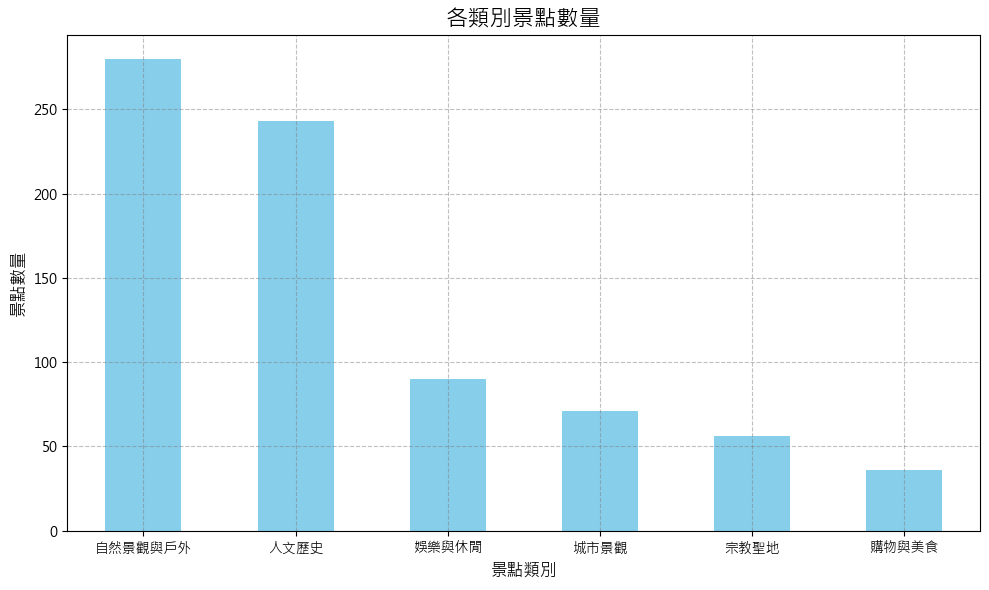

In [29]:
# 計算各類別景點數量
category_counts = new_basic_info_avg_rating_count_838['attraction_type'].value_counts()
print(category_counts)

# 調整圖表基本設定
category_counts.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('各類別景點數量', fontsize=16)
plt.xlabel('景點類別', fontsize=12)
plt.ylabel('景點數量', fontsize=12)

plt.xticks(rotation=0)
plt.grid(linestyle='--',color='gray', alpha=0.5)

# 自動調整文字間距
plt.tight_layout()
plt.show()

### 各類別平均評分

attraction_type
宗教聖地       4.525425
自然景觀與戶外    4.340374
城市景觀       4.311907
人文歷史       4.297815
娛樂與休閒      4.227456
購物與美食      4.158323
Name: avg_score, dtype: float64


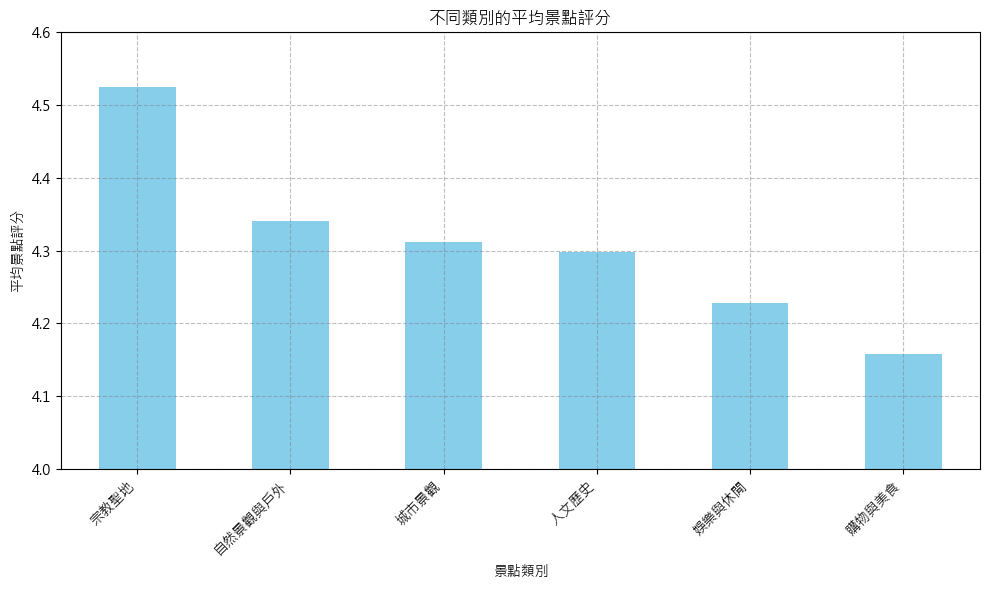

In [30]:
# 景點類別分析
category_groups = new_basic_info_avg_rating_count_838.groupby('attraction_type')['avg_score'].mean().sort_values(ascending=False)
print(category_groups)

# 畫圖
category_groups.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.xlabel('景點類別')
plt.ylabel('平均景點評分')
plt.title('不同類別的平均景點評分')

# 旋轉縣市名稱標籤 使其易於閱讀
plt.xticks(rotation=45, ha='right')
plt.yticks([4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6])
plt.grid(linestyle='--',color='gray', alpha=0.5)
plt.ylim(4,4.6)

# 自動調整文字間距
plt.tight_layout()

plt.show()

### 各類別平均情感分數

attraction_type
宗教聖地       61.552747
自然景觀與戶外    59.431612
城市景觀       58.023598
人文歷史       56.356808
娛樂與休閒      55.464707
購物與美食      52.839902
Name: avg_nlp, dtype: float64


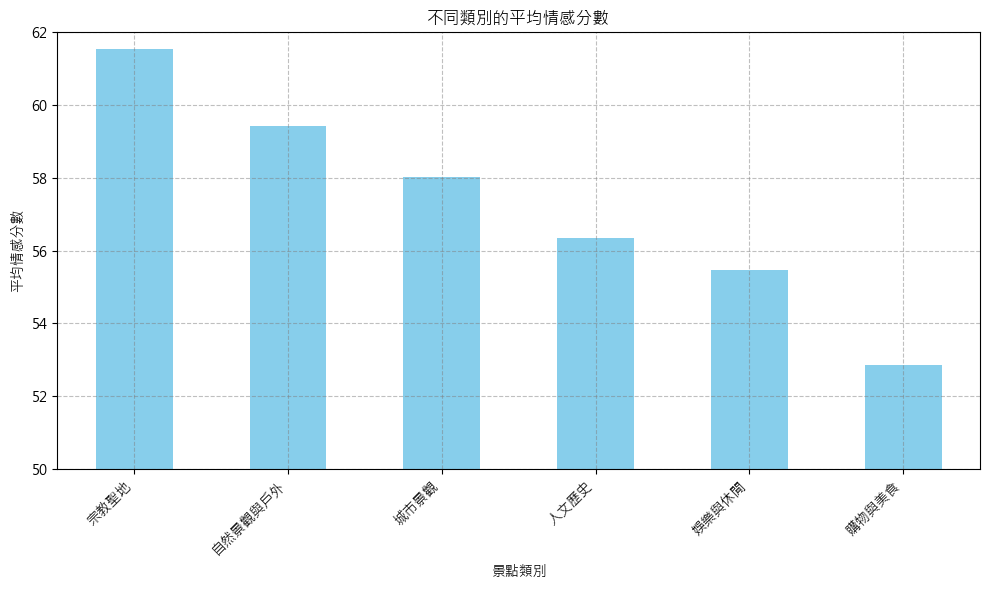

In [31]:
# 景點類別分析
nlp_category_groups = new_basic_info_avg_rating_count_838.groupby('attraction_type')['avg_nlp'].mean().sort_values(ascending=False)
print(nlp_category_groups)

# 畫圖
nlp_category_groups.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.xlabel('景點類別')
plt.ylabel('平均情感分數')
plt.title('不同類別的平均情感分數')

# 旋轉縣市名稱標籤 使其易於閱讀
plt.xticks(rotation=45, ha='right')
plt.grid(linestyle='--',color='gray', alpha=0.5)
plt.ylim(50, 62)

# 自動調整文字間距
plt.tight_layout()

plt.show()

### 各類別平均評分與情感分數並列

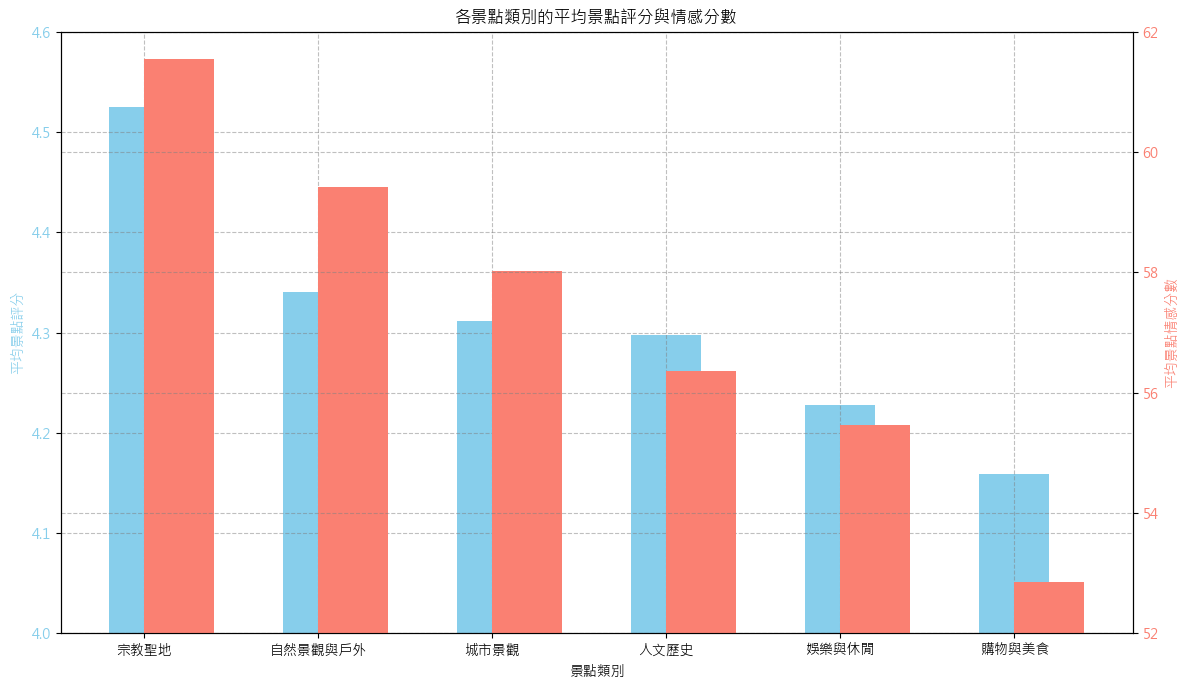

In [32]:
# 畫圖
fig, ax1 = plt.subplots(figsize=(12, 7))  # 調整圖表大小

# 繪製平均評分長條圖 (左 Y 軸)
color = 'skyblue'
ax1.set_xlabel('景點類別')
ax1.set_ylabel('平均景點評分', color=color)
ax1.bar(category_groups.index, category_groups.values, color=color, width=0.4, align='center') #調整長條圖寬度
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim(4, 4.6)
ax1.set_yticks([4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6])

# 創建第二個 Y 軸 (右 Y 軸)
ax2 = ax1.twinx()

# 繪製平均情感分數長條圖 (右 Y 軸)
color = 'salmon'
ax2.set_ylabel('平均景點情感分數', color=color)
ax2.bar(nlp_category_groups.index, nlp_category_groups.values, color=color, width=0.4, align='edge') #調整長條圖寬度並讓兩個長條圖不重疊
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(52, 62)


# 旋轉縣市名稱標籤 使其易於閱讀
plt.xticks(rotation=45, ha='right')
plt.grid(linestyle='--',color='gray', alpha=0.5)

# 設定標題
plt.title('各景點類別的平均景點評分與情感分數')

# 設定 X 軸刻度
plt.xticks(rotation=0)

# 加上格線
ax1.grid(linestyle='--', color='gray', alpha=0.5)

# 自動調整文字間距
plt.tight_layout()

# 顯示圖表
plt.show()

### 單點排行

In [33]:
# 前 / 後 n 名
rank_n = 50

#### 平均評分

In [34]:
# 全台前n低平均評分景點
bottom_n = new_basic_info_avg_rating_count_838.sort_values('avg_score')[:rank_n]
bottom_n

,location_id,gmap_location,attraction_type,address,avg_score,rating_count,avg_nlp
169,0x346e21916ed6ab03:0xe7203564c4a70c6,8大森林樂園,娛樂與休閒,屏東縣,3.397802,1820,48.344176
376,0x346817b7fb7a0831:0xc489cfec122f8f45,大溪花海農場,娛樂與休閒,桃園市,3.406584,2339,48.323051
269,0x345d4f0b15a26911:0x471ab443cc334803,碧砂漁港,自然景觀與戶外,基隆市,3.423077,650,40.478006
441,0x346900aa746447ab:0xd9ca0542b7ed4160,姜太公中部道場,人文歷史,苗栗縣,3.500356,2810,47.884949
637,0x3469adcb678ce0a3:0xcb6b04e95b70b9e1,臺灣客家八音戲曲推廣中心-苗栗客家圓樓,人文歷史,苗栗縣,3.523772,6310,45.328110
627,0x346e395aca97b3cb:0xad2b4997dc4038a2,大路觀主題樂園,娛樂與休閒,屏東縣,3.542282,1490,46.454668
474,0x34690187ac3bab3d:0x4e616348ed0b0139,汶水老街,人文歷史,苗栗縣,3.558001,2681,51.583020
495,0x346fa2e6468594cd:0x5c78911f2e620818,都蘭新東糖廠文化園區,人文歷史,台東縣,3.604293,4799,47.453012
476,0x3469095cb536d8f7:0x5ce636dfbb7dff7f,苑裡漁港,自然景觀與戶外,苗栗縣,3.669643,112,55.600000
149,0x346e8298ee08d2ab:0x8aef8cd9d34f1c45,布袋鹽山,自然景觀與戶外,嘉義縣,3.700000,970,44.733463


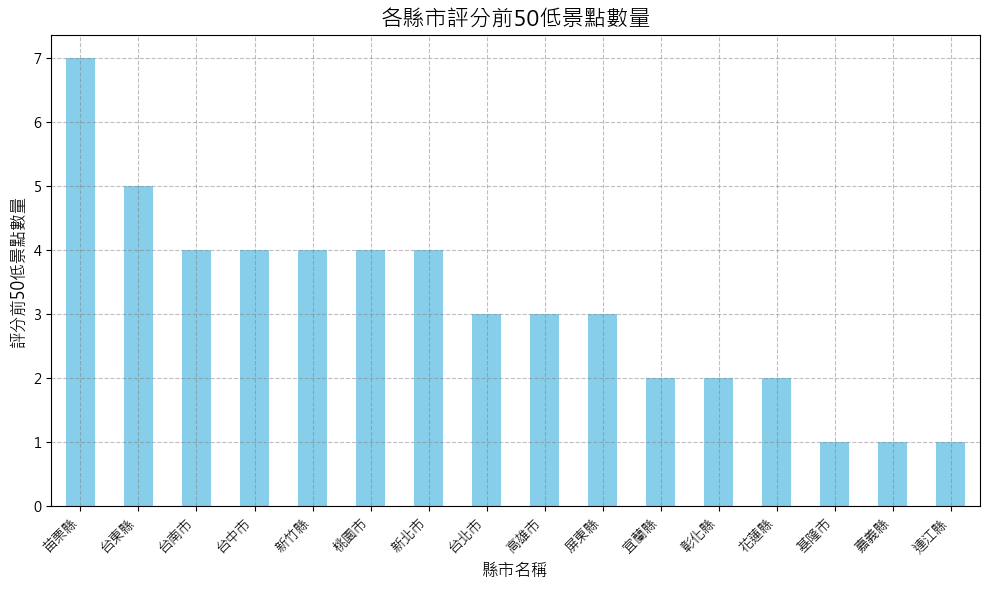

In [35]:
# 全台前n低平均評分景點 縣市分布
city_rating_bottom_n = bottom_n.groupby('address')['location_id'].count().sort_values(ascending=False)

# 調整圖表基本設定
city_rating_bottom_n.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title(f'各縣市評分前{rank_n}低景點數量', fontsize=16)
plt.xlabel('縣市名稱', fontsize=12)
plt.ylabel(f'評分前{rank_n}低景點數量', fontsize=12)

# 旋轉縣市名稱標籤，使其易於閱讀。
plt.xticks(rotation=45, ha='right')
plt.grid(linestyle='--',color='gray', alpha=0.5)

# 自動調整文字間距
plt.tight_layout()

plt.show()

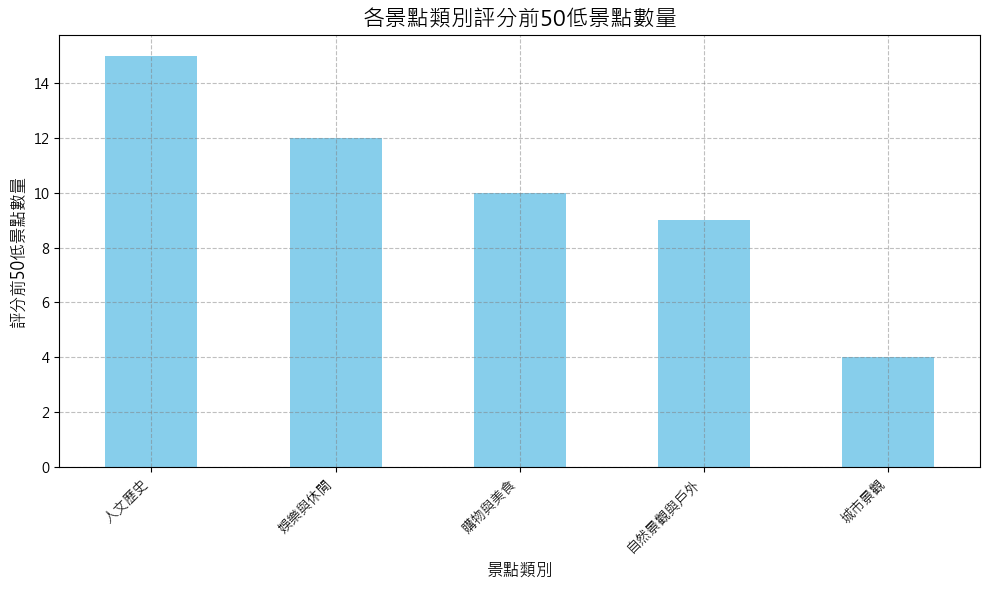

In [36]:
# 全台前n低平均評分景點 類別分布
type_rating_bottom_n = bottom_n.groupby('attraction_type')['location_id'].count().sort_values(ascending=False)

# 調整圖表基本設定
type_rating_bottom_n.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title(f'各景點類別評分前{rank_n}低景點數量', fontsize=16)
plt.xlabel('景點類別', fontsize=12)
plt.ylabel(f'評分前{rank_n}低景點數量', fontsize=12)

# 旋轉縣市名稱標籤，使其易於閱讀。
plt.xticks(rotation=45, ha='right')
plt.grid(linestyle='--',color='gray', alpha=0.5)

# 自動調整文字間距
plt.tight_layout()

plt.show()

In [37]:
# 全台前50高平均評分景點
top_n = new_basic_info_avg_rating_count_838.sort_values('avg_score',ascending=False)[:rank_n]
top_n

,location_id,gmap_location,attraction_type,address,avg_score,rating_count,avg_nlp
605,0x3471eff702c146db:0xc4e732514abb8e43,烏鬼洞雪花冰,購物與美食,屏東縣,4.985798,10280,59.906899
531,0x346fa5b538d68a21:0x2b0b366c41edb699,新元昌紅茶產業文化館,人文歷史,台東縣,4.960656,1220,70.964059
579,0x3469aa40137b5e93:0x67e11ff88059504e,臺灣蠶蜂昆蟲教育園區,娛樂與休閒,苗栗縣,4.872000,250,68.846154
417,0x346c6602e1b745f7:0xdfbad3ce8d3674a6,目斗嶼燈塔,人文歷史,澎湖縣,4.806818,440,67.021583
681,0x3414a54969d3f6ef:0xac84a9633aef02c6,金酒公司 經武酒窖(預約),購物與美食,金門縣,4.805556,180,40.324561
571,0x3442aebd1792f149:0xa863837c4292c2ae,郭元益糕餅博物館 台北士林館,人文歷史,台北市,4.798569,4890,54.807741
437,0x3441833807c92679:0x1eb1b0e329e05a38,東莒燈塔,人文歷史,連江縣,4.785366,410,63.215017
0,0x346885034084ae89:0x59a8b1eac5731c29,白楊步道水簾洞,自然景觀與戶外,花蓮縣,4.762067,2942,49.264338
438,0x3443ecc478e876bd:0x3f00791d4ee13e57,東引島燈塔,人文歷史,連江縣,4.761667,1200,68.840473
444,0x346eccc940c8aa57:0x96bbf91768a8afa,茶二指故事館,娛樂與休閒,南投縣,4.749200,14992,66.898202


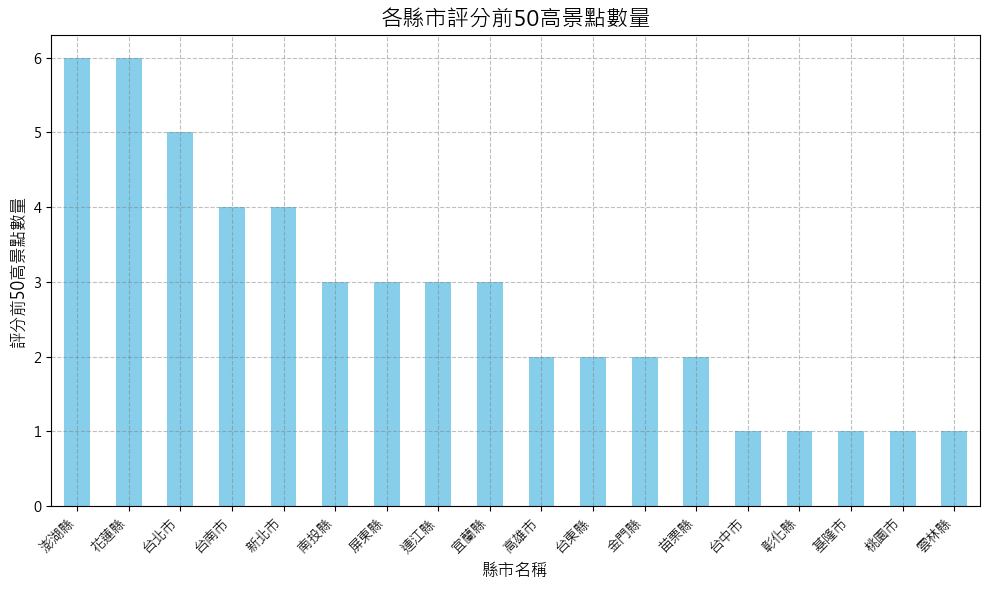

In [38]:
# 全台前50高平均評分景點縣市分布
city_rating_top_n = top_n.groupby('address')['location_id'].count().sort_values(ascending=False)

# 調整圖表基本設定
city_rating_top_n.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title(f'各縣市評分前{rank_n}高景點數量', fontsize=16)
plt.xlabel('縣市名稱', fontsize=12)
plt.ylabel(f'評分前{rank_n}高景點數量', fontsize=12)

# 旋轉縣市名稱標籤，使其易於閱讀。
plt.xticks(rotation=45, ha='right')
plt.grid(linestyle='--',color='gray', alpha=0.5)

# 自動調整文字間距
plt.tight_layout()

plt.show()

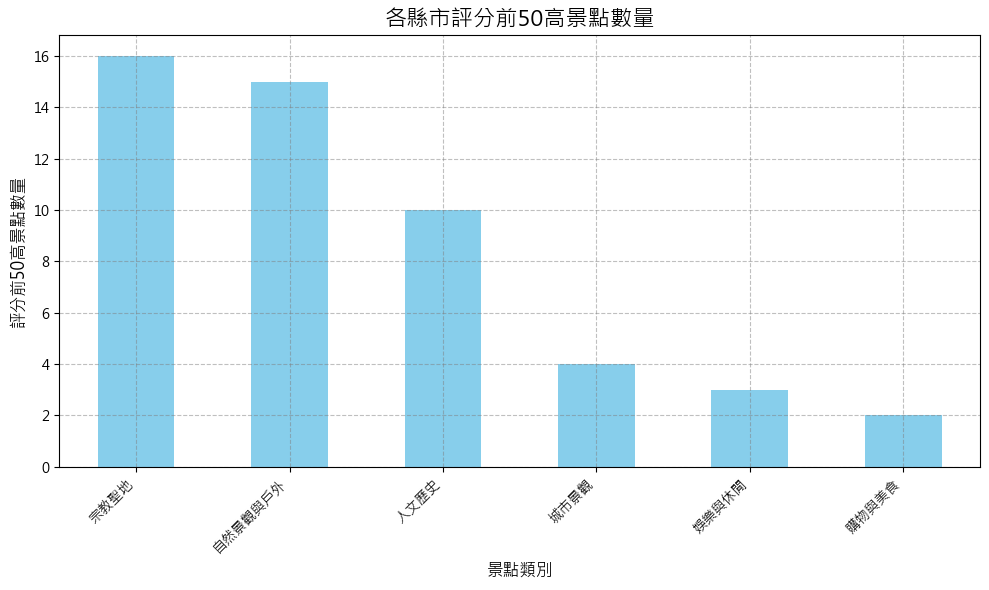

In [39]:
# 全台前50高平均評分景點類別分布
type_rating_top_n = top_n.groupby('attraction_type')['location_id'].count().sort_values(ascending=False)

# 調整圖表基本設定
type_rating_top_n.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title(f'各縣市評分前{rank_n}高景點數量', fontsize=16)
plt.xlabel('景點類別', fontsize=12)
plt.ylabel(f'評分前{rank_n}高景點數量', fontsize=12)

# 旋轉縣市名稱標籤，使其易於閱讀。
plt.xticks(rotation=45, ha='right')
plt.grid(linestyle='--',color='gray', alpha=0.5)

# 自動調整文字間距
plt.tight_layout()

plt.show()

In [40]:
# 各縣市平均分數最高的前 n 名
top_per_city = new_basic_info_avg_rating_count_838.groupby("address", group_keys=False).apply(lambda x: x.nlargest(3, "avg_score")).reset_index(drop=True)

top_per_city

,location_id,gmap_location,attraction_type,address,avg_score,rating_count,avg_nlp
0,0x346eccc940c8aa57:0x96bbf91768a8afa,茶二指故事館,娛樂與休閒,南投縣,4.749200,14992,66.898202
1,0x346892bee9aecdef:0x2b3fa0e973bc3fb4,合歡山,自然景觀與戶外,南投縣,4.745455,1870,62.087968
2,0x34692a44bbc644a3:0x79a61e7b025cd2f1,貯木池,自然景觀與戶外,南投縣,4.679775,178,75.819672
3,0x3468f320acc36fa1:0x85015a440d405b7,福壽山農場|千櫻園,自然景觀與戶外,台中市,4.709504,2420,52.566165
4,0x34686054379a72ef:0xc9a7fafb89b6d51,武陵國家森林遊樂區,自然景觀與戶外,台中市,4.630645,620,68.217391
...,...,...,...,...,...,...,...
61,0x346eb4418cdd9489:0xc2015a7797ffdfc3,西螺大橋,城市景觀,雲林縣,4.582677,635,48.849858
62,0x346eb0a50621e0d1:0x1da056d794c51f51,建國一村丁棟,人文歷史,雲林縣,4.312500,720,48.305949
63,0x346e16af31025c23:0xb00bb3331325e3dd,佛光山大雄寶殿,宗教聖地,高雄市,4.700736,1223,61.111940
64,0x346e04b4a82164fd:0xfc0458161ba32226,衛武營 國家藝術文化中心,城市景觀,高雄市,4.652619,19719,60.291015


In [41]:
# 各縣市平均分數最低的前 n 名
bottom_per_city = (new_basic_info_avg_rating_count_838.groupby("address", group_keys=False).apply(lambda x: x.nsmallest(3, "avg_score"))).reset_index(drop=True)

bottom_per_city

,location_id,gmap_location,attraction_type,address,avg_score,rating_count,avg_nlp
0,0x346ed24ac039c5e3:0xc66daac6722f87db,鹿谷鄉農會茶業文化館,購物與美食,南投縣,4.023000,1000,54.770833
1,0x346f27af89cc1807:0xc2b5115b6e7c1d0d,東埔溫泉,人文歷史,南投縣,4.032990,970,56.925065
2,0x3468d9a0835cca99:0x4fade27e242c3365,埔里城觀光夜市,購物與美食,南投縣,4.039644,8425,49.242741
3,0x34693cbb36cda2c3:0x2a703ebcb25ba3e0,大里藝術廣場,人文歷史,台中市,3.738435,8820,47.575989
4,0x3469158c09fc1c6f:0x1155c09505e080ed,東海藝術街商圈,購物與美食,台中市,3.791053,3599,57.932649
...,...,...,...,...,...,...,...
61,0x346ec6a52bb8f4a1:0xe08da7de75264566,華山溪吊橋（華山小天梯）-華山休閒農業區,自然景觀與戶外,雲林縣,4.142000,1500,54.923513
62,0x346ec721c9f75899:0xb0ce8296124f8030,劍湖山世界主題樂園,娛樂與休閒,雲林縣,4.200287,20920,53.823757
63,0x346e048bc0d739c7:0xd3e6e842bfa0ecfd,六合觀光夜市,購物與美食,高雄市,3.720734,36220,43.900340
64,0x346e05639fe9e307:0xc043a0d5465b6207,半屏湖濕地公園,自然景觀與戶外,高雄市,3.821429,140,56.523810


In [42]:
# 各縣市中各類別平均分數最高的前 n 名
top_per_city_type = new_basic_info_avg_rating_count_838.groupby(["address","attraction_type"], group_keys=False).apply(lambda x: x.nlargest(1, "avg_score")).reset_index(drop=True)

top_per_city_type

,location_id,gmap_location,attraction_type,address,avg_score,rating_count,avg_nlp
0,0x3468d9ad8c26e85f:0x9dfa785babeae73a,蝴蝶小鎮生態休閒園區-木生昆蟲博物館,人文歷史,南投縣,4.627722,3398,56.312096
1,0x3468d4e0ac7333d3:0x31e051e206cd4184,雙龍七彩吊橋,城市景觀,南投縣,4.343852,4310,51.812684
2,0x346eccc940c8aa57:0x96bbf91768a8afa,茶二指故事館,娛樂與休閒,南投縣,4.749200,14992,66.898202
3,0x3468d668e2f4582b:0xfd1f9cd4796180f0,日月潭 文武廟,宗教聖地,南投縣,4.620599,3437,64.962457
4,0x346892bee9aecdef:0x2b3fa0e973bc3fb4,合歡山,自然景觀與戶外,南投縣,4.745455,1870,62.087968
...,...,...,...,...,...,...,...
107,0x346e04b4a82164fd:0xfc0458161ba32226,衛武營 國家藝術文化中心,城市景觀,高雄市,4.652619,19719,60.291015
108,0x346e111bbe79e287:0xdf4693162b1707e0,義大遊樂世界,娛樂與休閒,高雄市,4.244375,28489,55.631678
109,0x346e16af31025c23:0xb00bb3331325e3dd,佛光山大雄寶殿,宗教聖地,高雄市,4.700736,1223,61.111940
110,0x3409e9e7b20f779f:0x642c8eabed35620d,東沙環礁國家公園,自然景觀與戶外,高雄市,4.623529,170,54.090909


In [43]:
# 各縣市中各類別平均分數最低的前 n 名
bottom_per_city_type = new_basic_info_avg_rating_count_838.groupby(["address","attraction_type"], group_keys=False).apply(lambda x: x.nsmallest(1, "avg_score")).reset_index(drop=True)

bottom_per_city_type

,location_id,gmap_location,attraction_type,address,avg_score,rating_count,avg_nlp
0,0x346f27af89cc1807:0xc2b5115b6e7c1d0d,東埔溫泉,人文歷史,南投縣,4.032990,970,56.925065
1,0x3468d5deaaaaaaab:0x883576fbfb5e7f41,伊達邵商店街,城市景觀,南投縣,4.188718,11080,58.508368
2,0x3468d9b2c534d223:0xceb30f93b82d7fa1,牛耳藝術渡假村,娛樂與休閒,南投縣,4.041756,3281,56.139423
3,0x3468d5e19d06d819:0xb60dd4a05fb9455d,玄光寺,宗教聖地,南投縣,4.298077,7280,65.920699
4,0x3468d66265f1c4cd:0x3a15c21d90081e49,大竹湖步道,自然景觀與戶外,南投縣,4.247826,230,60.617391
...,...,...,...,...,...,...,...
107,0x346e047d7c521ce9:0xef164ebda8a6714,城市光廊,城市景觀,高雄市,4.067724,3027,64.423416
108,0x346e59941760e089:0xe8add9b3b63406ea,不老溫泉渡假村,娛樂與休閒,高雄市,3.920534,1724,43.212299
109,0x346e057633258ec9:0x335f4a4a441cd5c0,左營孔子廟,宗教聖地,高雄市,4.311779,1995,60.477320
110,0x346e05639fe9e307:0xc043a0d5465b6207,半屏湖濕地公園,自然景觀與戶外,高雄市,3.821429,140,56.523810


#### 平均情感分數

In [44]:
# 全台前n低平均情感分數景點
nlp_bottom_n = new_basic_info_avg_rating_count_838.sort_values('avg_nlp')[:rank_n]
nlp_bottom_n

,location_id,gmap_location,attraction_type,address,avg_score,rating_count,avg_nlp
732,0x3441708ad3170f8f:0xf60a8ff8ac4331ba,馬祖酒廠,購物與美食,連江縣,3.744000,250,32.721591
757,0x346e467d8b1c4af5:0x82f0dd876cf8e7bd,情人谷瀑布,自然景觀與戶外,高雄市,3.934343,1386,38.089859
407,0x346801bb6da42cbb:0xec127007e626bc68,國史館,人文歷史,台北市,4.237778,450,38.240343
648,0x3467fa4a6daebdef:0xb3466f84cbf68fb9,湯圍溝溫泉公園,娛樂與休閒,宜蘭縣,4.152750,19581,38.578265
638,0x345d4fad79c6359b:0x9fb98b8b821613d,基隆塔,人文歷史,基隆市,4.301562,1920,39.324397
218,0x346f6bcfefb5fb1f:0x8f8e16ccb8475b45,安通溫泉飯店,娛樂與休閒,花蓮縣,4.004295,2561,39.667393
183,0x3442aff764f25b4d:0xdefaa6ee57f4adcb,關渡碼頭貨櫃市集,購物與美食,台北市,3.849216,829,39.796715
808,0x3467fa377ec567d9:0x730c97ad213acefe,礁溪溫泉公園泡腳池,娛樂與休閒,宜蘭縣,4.311765,2550,40.186386
681,0x3414a54969d3f6ef:0xac84a9633aef02c6,金酒公司 經武酒窖(預約),購物與美食,金門縣,4.805556,180,40.324561
269,0x345d4f0b15a26911:0x471ab443cc334803,碧砂漁港,自然景觀與戶外,基隆市,3.423077,650,40.478006


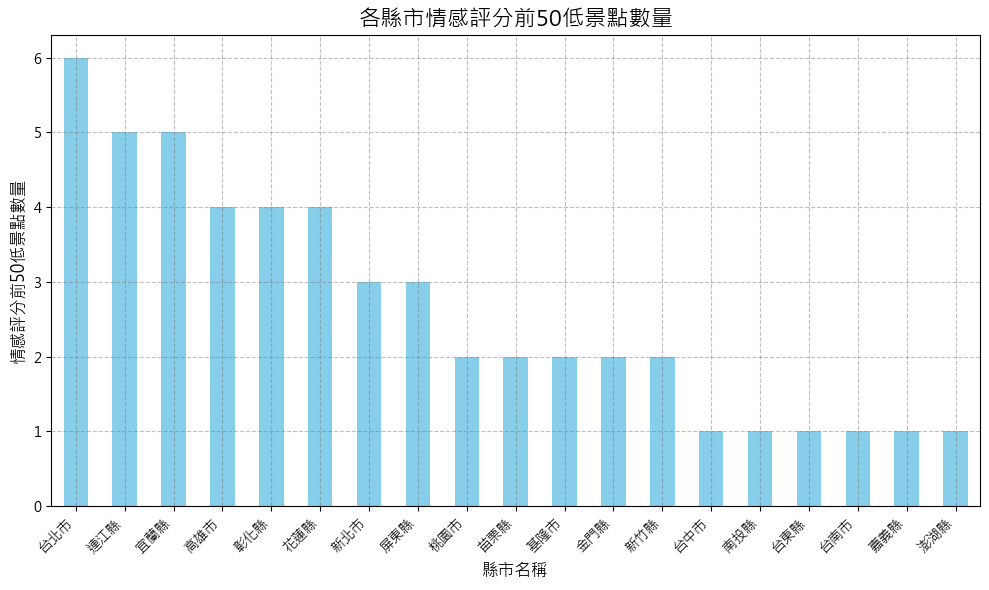

In [45]:
# 全台前n低平均請感分數景點 縣市分布
city_nlp_bottom_n = nlp_bottom_n.groupby('address')['location_id'].count().sort_values(ascending=False)

# 調整圖表基本設定
city_nlp_bottom_n.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title(f'各縣市情感評分前{rank_n}低景點數量', fontsize=16)
plt.xlabel('縣市名稱', fontsize=12)
plt.ylabel(f'情感評分前{rank_n}低景點數量', fontsize=12)

# 旋轉縣市名稱標籤，使其易於閱讀。
plt.xticks(rotation=45, ha='right')
plt.grid(linestyle='--',color='gray', alpha=0.5)

# 自動調整文字間距
plt.tight_layout()

plt.show()

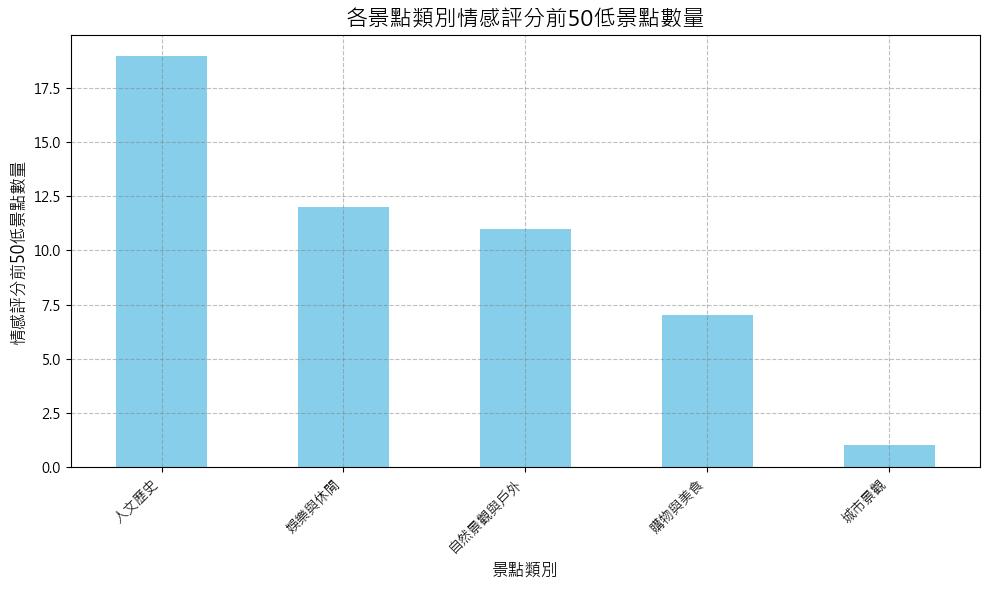

In [46]:
# 全台前n低平均情感分數景點 類別分布
type_nlp_bottom_n = nlp_bottom_n.groupby('attraction_type')['location_id'].count().sort_values(ascending=False)

# 調整圖表基本設定
type_nlp_bottom_n.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title(f'各景點類別情感評分前{rank_n}低景點數量', fontsize=16)
plt.xlabel('景點類別', fontsize=12)
plt.ylabel(f'情感評分前{rank_n}低景點數量', fontsize=12)

# 旋轉縣市名稱標籤，使其易於閱讀。
plt.xticks(rotation=45, ha='right')
plt.grid(linestyle='--',color='gray', alpha=0.5)

# 自動調整文字間距
plt.tight_layout()

plt.show()

In [47]:
# 全台前50高平均情感分數景點
nlp_top_n = new_basic_info_avg_rating_count_838.sort_values('avg_nlp',ascending=False)[:rank_n]
nlp_top_n

,location_id,gmap_location,attraction_type,address,avg_score,rating_count,avg_nlp
512,0x34692a44bbc644a3:0x79a61e7b025cd2f1,貯木池,自然景觀與戶外,南投縣,4.679775,178,75.819672
712,0x3468d5e76b6da159:0x86cc182c8b2182ff,玄奘大師紀念館,人文歷史,南投縣,4.496178,3140,73.267615
229,0x346e04fb21935ccd:0xf44e336c93ecbd,愛河,自然景觀與戶外,高雄市,4.387500,1280,73.045770
101,0x34693e1c3a406707:0xd43d01bc4fb2806a,東海大學,人文歷史,台中市,4.479301,3261,73.008679
686,0x3468d5d7b5ec9979:0x8a12b67ae8564ae8,伊達邵親水步道,娛樂與休閒,南投縣,4.515385,520,72.652038
69,0x346e1463e31e3aab:0x47ba75f95a36451a,茂林國家風景區管理處新威遊客中心,自然景觀與戶外,高雄市,4.424514,669,72.113846
299,0x346e95b2e5e97ca3:0xc8d84a75e3a43f16,林業試驗所嘉義樹木園,自然景觀與戶外,嘉義市,4.598230,1130,71.888530
241,0x346c450f6ebe063f:0x4fc7e4cd257f82c6,林投公園,自然景觀與戶外,澎湖縣,4.435119,1680,71.854522
597,0x345d4b5c72449969:0x85a4a14c1ac3833,獅頭山公園,自然景觀與戶外,新北市,4.343842,6820,71.561952
583,0x346e422087738e51:0x6768d416f894b0f0,美濃湖,自然景觀與戶外,高雄市,4.361995,1163,71.518293


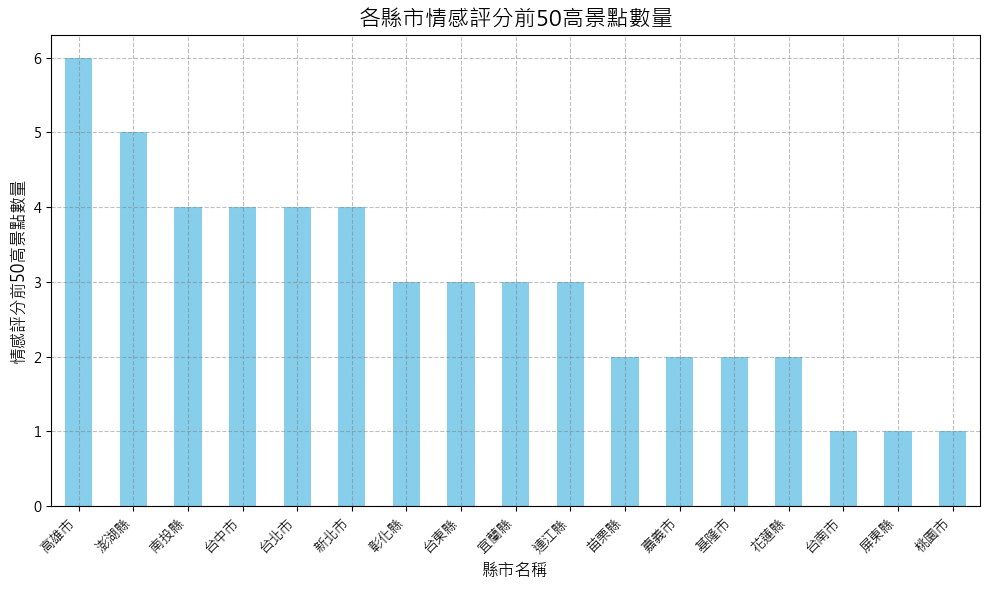

In [48]:
# 全台前n高平均情感分數景點 類別分布
city_nlp_top_n = nlp_top_n.groupby('address')['location_id'].count().sort_values(ascending=False)

# 調整圖表基本設定
city_nlp_top_n.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title(f'各縣市情感評分前{rank_n}高景點數量', fontsize=16)
plt.xlabel('縣市名稱', fontsize=12)
plt.ylabel(f'情感評分前{rank_n}高景點數量', fontsize=12)

# 旋轉縣市名稱標籤，使其易於閱讀。
plt.xticks(rotation=45, ha='right')
plt.grid(linestyle='--',color='gray', alpha=0.5)

# 自動調整文字間距
plt.tight_layout()

plt.show()

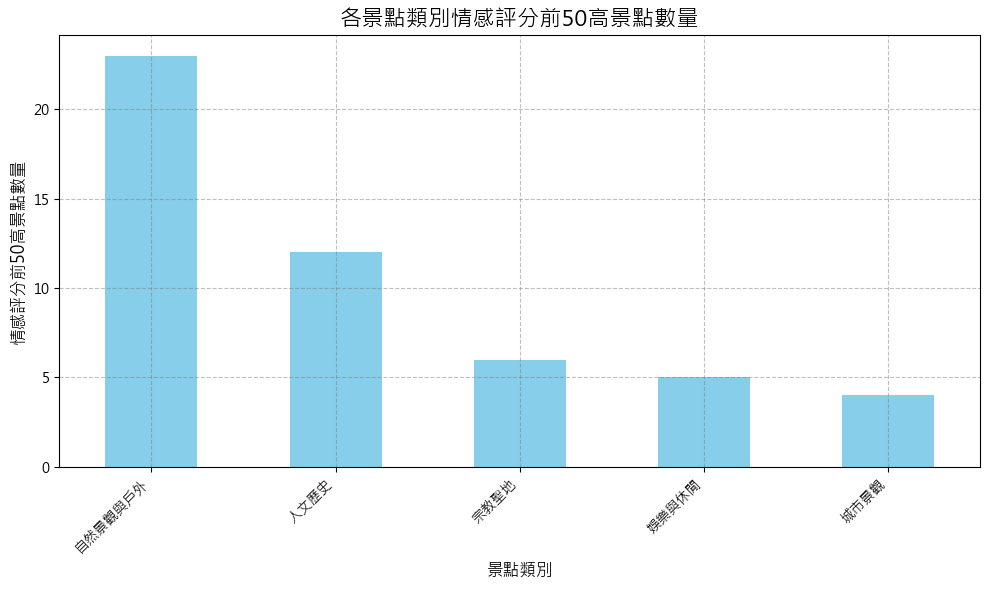

In [49]:
# 全台前n高平均情感分數景點 類別分布
type_nlp_top_n = nlp_top_n.groupby('attraction_type')['location_id'].count().sort_values(ascending=False)

# 調整圖表基本設定
type_nlp_top_n.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title(f'各景點類別情感評分前{rank_n}高景點數量', fontsize=16)
plt.xlabel('景點類別', fontsize=12)
plt.ylabel(f'情感評分前{rank_n}高景點數量', fontsize=12)

# 旋轉縣市名稱標籤，使其易於閱讀。
plt.xticks(rotation=45, ha='right')
plt.grid(linestyle='--',color='gray', alpha=0.5)

# 自動調整文字間距
plt.tight_layout()

plt.show()

In [50]:
# 各縣市平均情感分數最高的前 n 名
top_nlp_per_city = new_basic_info_avg_rating_count_838.groupby("address", group_keys=False).apply(lambda x: x.nlargest(3, "avg_nlp")).reset_index(drop=True)

top_nlp_per_city

,location_id,gmap_location,attraction_type,address,avg_score,rating_count,avg_nlp
0,0x34692a44bbc644a3:0x79a61e7b025cd2f1,貯木池,自然景觀與戶外,南投縣,4.679775,178,75.819672
1,0x3468d5e76b6da159:0x86cc182c8b2182ff,玄奘大師紀念館,人文歷史,南投縣,4.496178,3140,73.267615
2,0x3468d5d7b5ec9979:0x8a12b67ae8564ae8,伊達邵親水步道,娛樂與休閒,南投縣,4.515385,520,72.652038
3,0x34693e1c3a406707:0xd43d01bc4fb2806a,東海大學,人文歷史,台中市,4.479301,3261,73.008679
4,0x34693f782070eb6b:0x22dfbcfc3665869b,磺溪書院,人文歷史,台中市,4.470644,2112,69.595870
...,...,...,...,...,...,...,...
61,0x346e9e33ad0681ff:0xdf6fe6a756b12c5f,椬梧滯洪池(Yiwu Wet Pond),城市景觀,雲林縣,4.278049,2870,64.075899
62,0x346ea285b604f125:0x7a7c8b94e816afce,北港朝天宮,宗教聖地,雲林縣,4.676138,20870,60.764096
63,0x346e04fb21935ccd:0xf44e336c93ecbd,愛河,自然景觀與戶外,高雄市,4.387500,1280,73.045770
64,0x346e1463e31e3aab:0x47ba75f95a36451a,茂林國家風景區管理處新威遊客中心,自然景觀與戶外,高雄市,4.424514,669,72.113846


In [51]:
# 各縣市中各類別平均情感分數最高的前 n 名
top_nlp_per_city_type = new_basic_info_avg_rating_count_838.groupby(["address","attraction_type"], group_keys=False).apply(lambda x: x.nlargest(1, "avg_nlp")).reset_index(drop=True)

top_nlp_per_city_type

,location_id,gmap_location,attraction_type,address,avg_score,rating_count,avg_nlp
0,0x3468d5e76b6da159:0x86cc182c8b2182ff,玄奘大師紀念館,人文歷史,南投縣,4.496178,3140,73.267615
1,0x3468d5deaaaaaaab:0x883576fbfb5e7f41,伊達邵商店街,城市景觀,南投縣,4.188718,11080,58.508368
2,0x3468d5d7b5ec9979:0x8a12b67ae8564ae8,伊達邵親水步道,娛樂與休閒,南投縣,4.515385,520,72.652038
3,0x3468d5e19d06d819:0xb60dd4a05fb9455d,玄光寺,宗教聖地,南投縣,4.298077,7280,65.920699
4,0x34692a44bbc644a3:0x79a61e7b025cd2f1,貯木池,自然景觀與戶外,南投縣,4.679775,178,75.819672
...,...,...,...,...,...,...,...
107,0x346e04fbf8f2c8b5:0x73152b08ce5a4a9a,愛河之心,城市景觀,高雄市,4.173398,5150,67.752115
108,0x346e6a6d2b0cb93d:0x552ff93494ff0df2,美濃民俗村,娛樂與休閒,高雄市,3.966915,10216,60.135336
109,0x346e414ef2e10d7f:0xcff12fb58508627b,一貫道寶光建德神威天臺山道場,宗教聖地,高雄市,4.353730,3056,63.964570
110,0x346e04fb21935ccd:0xf44e336c93ecbd,愛河,自然景觀與戶外,高雄市,4.387500,1280,73.045770


In [52]:
# 各縣市平均情感分數最低的前 n 名
bottom_nlp_per_city = new_basic_info_avg_rating_count_838.groupby("address", group_keys=False).apply(lambda x: x.nsmallest(3, "avg_nlp")).reset_index(drop=True)

bottom_nlp_per_city

,location_id,gmap_location,attraction_type,address,avg_score,rating_count,avg_nlp
0,0x34692ac26253f529:0xd0ddcc1acdea6efa,水里蛇窯陶藝文化園區,娛樂與休閒,南投縣,4.124880,4180,43.735718
1,0x3468d97bf0bec6fb:0x1d1251b1a9d53a1a,臺灣地理中心碑,人文歷史,南投縣,4.055288,8085,47.901418
2,0x3468d9a0835cca99:0x4fade27e242c3365,埔里城觀光夜市,購物與美食,南投縣,4.039644,8425,49.242741
3,0x3468e10d3f5ff4f1:0xa85be16874443e06,裡冷溪探索園區,自然景觀與戶外,台中市,4.015556,450,45.852590
4,0x34693cbb36cda2c3:0x2a703ebcb25ba3e0,大里藝術廣場,人文歷史,台中市,3.738435,8820,47.575989
...,...,...,...,...,...,...,...
61,0x346e9fb5e4bdaafd:0xdea969f790ed48ce,口湖遊客中心,自然景觀與戶外,雲林縣,4.108142,2395,48.408845
62,0x346eb4418cdd9489:0xc2015a7797ffdfc3,西螺大橋,城市景觀,雲林縣,4.582677,635,48.849858
63,0x346e467d8b1c4af5:0x82f0dd876cf8e7bd,情人谷瀑布,自然景觀與戶外,高雄市,3.934343,1386,38.089859
64,0x346e59941760e089:0xe8add9b3b63406ea,不老溫泉渡假村,娛樂與休閒,高雄市,3.920534,1724,43.212299


In [53]:
# 各縣市中各類別平均情感分數最低的前 n 名
bottom_nlp_per_city_type = new_basic_info_avg_rating_count_838.groupby(["address","attraction_type"], group_keys=False).apply(lambda x: x.nsmallest(1, "avg_nlp")).reset_index(drop=True)

bottom_nlp_per_city_type

,location_id,gmap_location,attraction_type,address,avg_score,rating_count,avg_nlp
0,0x3468d97bf0bec6fb:0x1d1251b1a9d53a1a,臺灣地理中心碑,人文歷史,南投縣,4.055288,8085,47.901418
1,0x3468d4e0ac7333d3:0x31e051e206cd4184,雙龍七彩吊橋,城市景觀,南投縣,4.343852,4310,51.812684
2,0x34692ac26253f529:0xd0ddcc1acdea6efa,水里蛇窯陶藝文化園區,娛樂與休閒,南投縣,4.124880,4180,43.735718
3,0x1408b657b045e039:0xbbc770472c61b427,中台禪寺,宗教聖地,南投縣,4.400213,4700,58.510976
4,0x346892e714b93e97:0x7c5d66d1f5971e28,太魯閣國家公園合歡山管理站,自然景觀與戶外,南投縣,4.513669,1390,52.278592
...,...,...,...,...,...,...,...
107,0x346e037f2a5a9001:0x28af37aaf30894aa,高雄85大樓,城市景觀,高雄市,4.074543,13120,50.715764
108,0x346e59941760e089:0xe8add9b3b63406ea,不老溫泉渡假村,娛樂與休閒,高雄市,3.920534,1724,43.212299
109,0x346e057633258ec9:0x335f4a4a441cd5c0,左營孔子廟,宗教聖地,高雄市,4.311779,1995,60.477320
110,0x346e467d8b1c4af5:0x82f0dd876cf8e7bd,情人谷瀑布,自然景觀與戶外,高雄市,3.934343,1386,38.089859


## 雙維度分析

### 縣市與類別平均評分

In [54]:
# 縣市與類別的評分平均樞紐分析
city_type = new_basic_info_avg_rating_count_838.pivot_table('avg_score', index='address', columns='attraction_type', aggfunc='mean')
city_type.round(5)

attraction_type,人文歷史,城市景觀,娛樂與休閒,宗教聖地,自然景觀與戶外,購物與美食
address,,,,,,
南投縣,4.32520,4.24217,4.39910,4.43963,4.46582,4.04874
台中市,4.33734,4.29342,4.31346,4.50089,4.36243,3.96406
台北市,4.40723,4.44828,4.36028,4.55536,4.43569,4.22284
台南市,4.28746,4.14384,4.23531,4.57922,4.22784,4.03425
台東縣,4.37119,4.02261,4.15938,4.38240,4.33048,NaN
嘉義市,4.38464,4.25714,NaN,NaN,4.32593,4.22375
嘉義縣,4.32076,4.15394,NaN,NaN,4.22549,NaN
基隆市,4.26763,4.46915,NaN,NaN,4.26071,4.22272
宜蘭縣,4.30430,4.39541,4.35841,4.69978,4.35038,4.27761


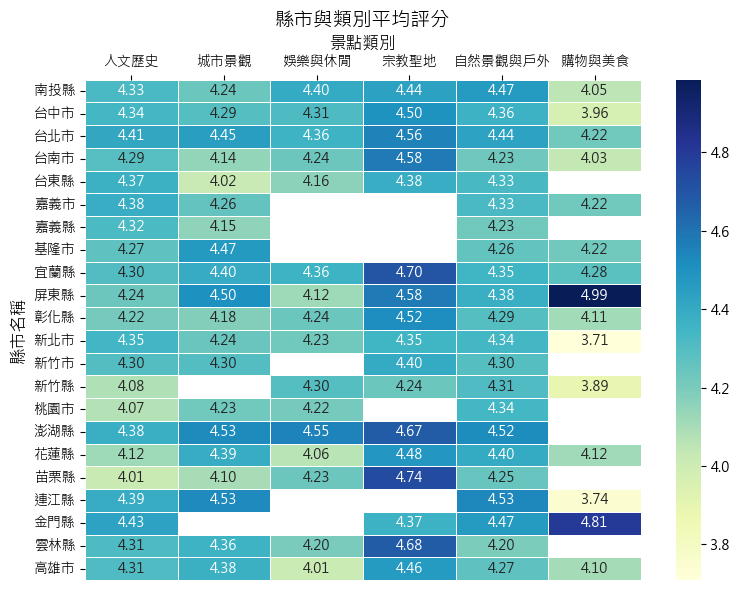

In [55]:
# 繪製熱力圖
plt.figure(figsize=(8, 6))
ax = sns.heatmap(city_type, cmap="YlGnBu", annot=True, fmt=".2f", linewidths=0.5)

# 讓類別名稱標籤出現在上方
ax.xaxis.set_label_position("top")
ax.xaxis.tick_top()

plt.xticks(rotation=0)
plt.title("縣市與類別平均評分",fontsize=14)
plt.ylabel("縣市名稱",fontsize=12)
plt.xlabel("景點類別",fontsize=12)
plt.tight_layout()
plt.show()

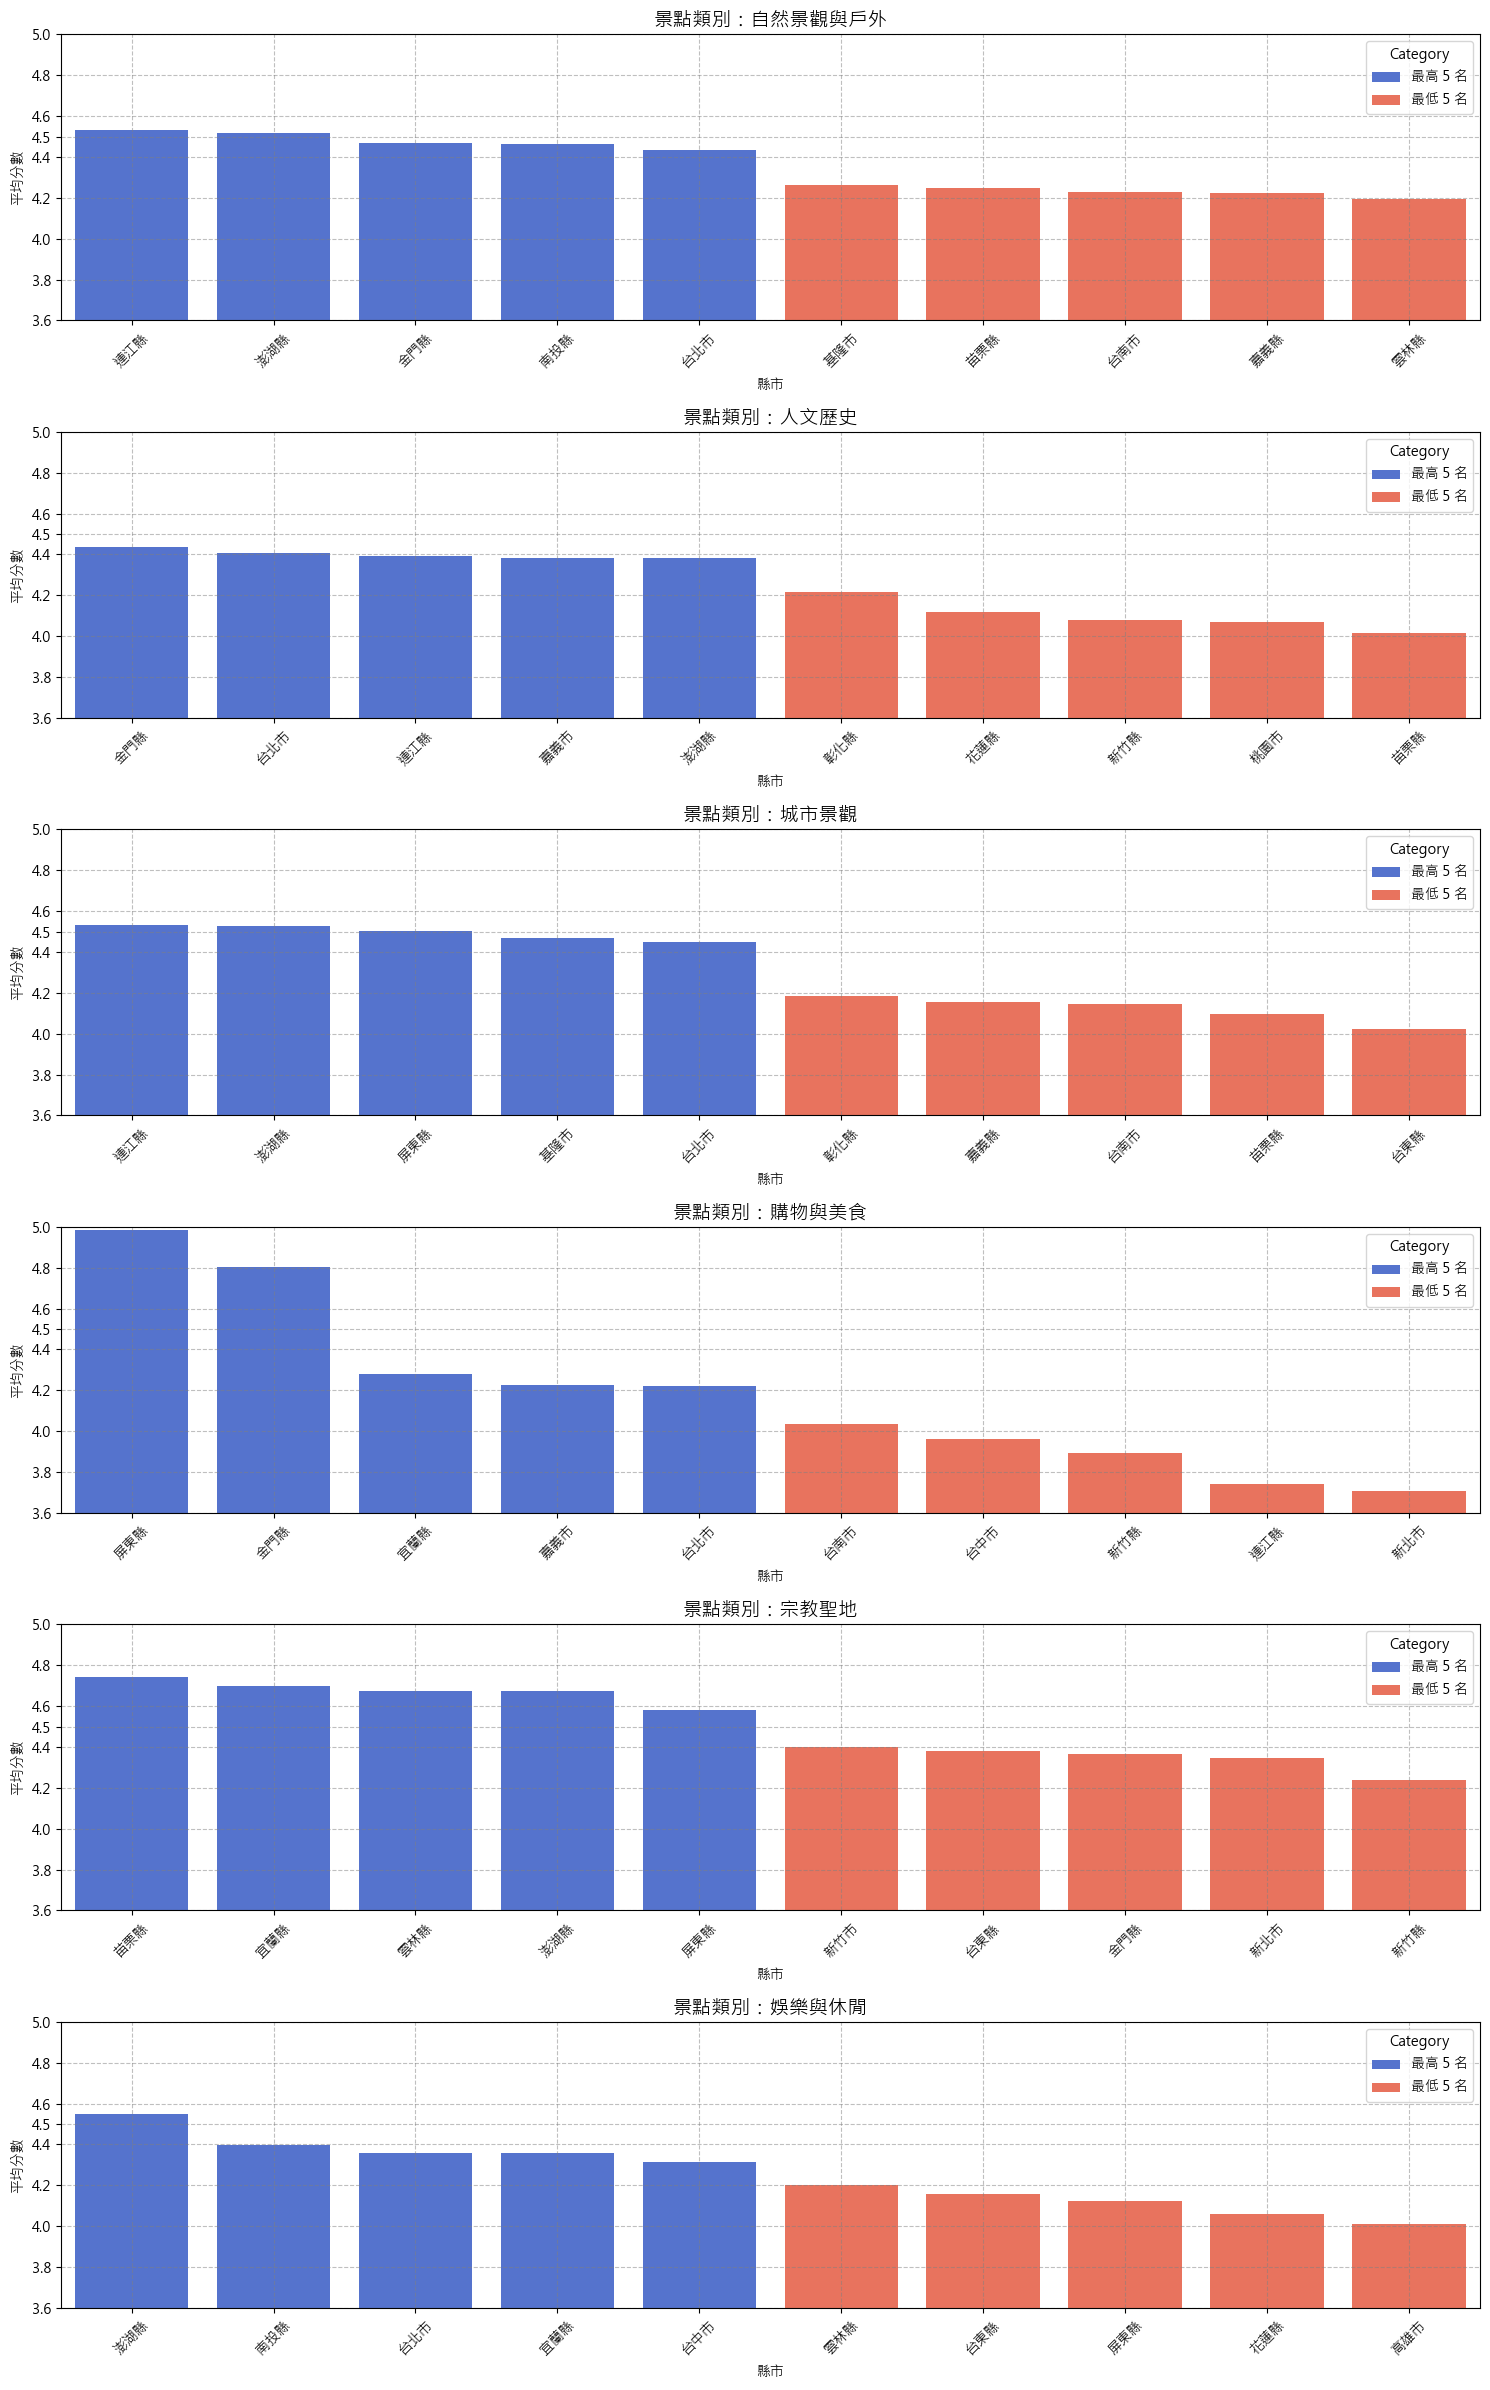

In [56]:
# 使用子圖的方式 只取最高和最低n名

n = 5

# 地點類別數量
categories = new_basic_info_avg_rating_count_838["attraction_type"].unique()
num_categories = len(categories)

# 設定子圖的行數與列數
fig, axes = plt.subplots(nrows=num_categories, ncols=1, figsize=(15, 4 * num_categories))

# 繪製每個地點類別的圖
for ax, category in zip(axes, categories):
    
    # 先算出平均
    df_avg = new_basic_info_avg_rating_count_838.groupby(["address", "attraction_type"], as_index=False)["avg_score"].mean()

    # 篩選出該類別的數據
    df_category = df_avg[df_avg["attraction_type"] == category]
    
    # 取最高 n 名
    df_top_n = df_category[df_category["avg_score"] >= df_category["avg_score"].nlargest(n).min()].sort_values('avg_score',ascending=False)
    df_top_n["Category"] = f"最高 {n} 名"

    # 取最低 n 名
    df_bottom_n = df_category[df_category["avg_score"] <= df_category["avg_score"].nsmallest(n).max()].sort_values('avg_score',ascending=False)
    df_bottom_n["Category"] = f"最低 {n} 名"

    df_combined = pd.concat([df_top_n, df_bottom_n])
    
    sns.barplot(
        data=df_combined,
        x="address",
        y="avg_score",
        hue="Category",
        ax=ax,
        ci=None,
        palette={f"最高 {n} 名": "royalblue", f"最低 {n} 名": "tomato"}
    )
    ax.set_title(f"景點類別：{category}", fontsize=14) 
    ax.set_xlabel("縣市") 
    ax.set_ylabel("平均分數") 
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45) 
    ax.set_yticks([3.6, 3.8, 4.0, 4.2, 4.4, 4.5, 4.6, 4.8, 5.0])
    ax.grid(linestyle='--',color='gray', alpha=0.5)
    ax.set_ylim(3.6, 5)

# 調整子圖間距
plt.tight_layout()
plt.show()

### 縣市與類別平均情感分數

In [57]:
# 縣市與類別的評分平均樞紐分析
city_type_nlp = new_basic_info_avg_rating_count_838.pivot_table('avg_nlp', index='address', columns='attraction_type', aggfunc='mean')
city_type_nlp.round(5)

attraction_type,人文歷史,城市景觀,娛樂與休閒,宗教聖地,自然景觀與戶外,購物與美食
address,,,,,,
南投縣,58.62549,55.76776,59.20340,63.13138,61.83019,51.43849
台中市,60.59810,57.67329,55.96183,60.50126,56.75868,57.27902
台北市,54.44379,60.02779,57.86576,60.31351,62.14217,53.90474
台南市,55.00029,57.22531,57.52344,59.60955,58.51925,50.69014
台東縣,61.57151,53.35990,52.95444,70.48463,58.07944,NaN
嘉義市,53.12572,53.31250,NaN,NaN,64.77533,53.33582
嘉義縣,56.72850,53.07449,NaN,NaN,60.30169,NaN
基隆市,52.39121,53.42707,NaN,NaN,57.28976,51.65473
宜蘭縣,61.36309,60.30766,46.58999,65.42870,58.52383,54.82530


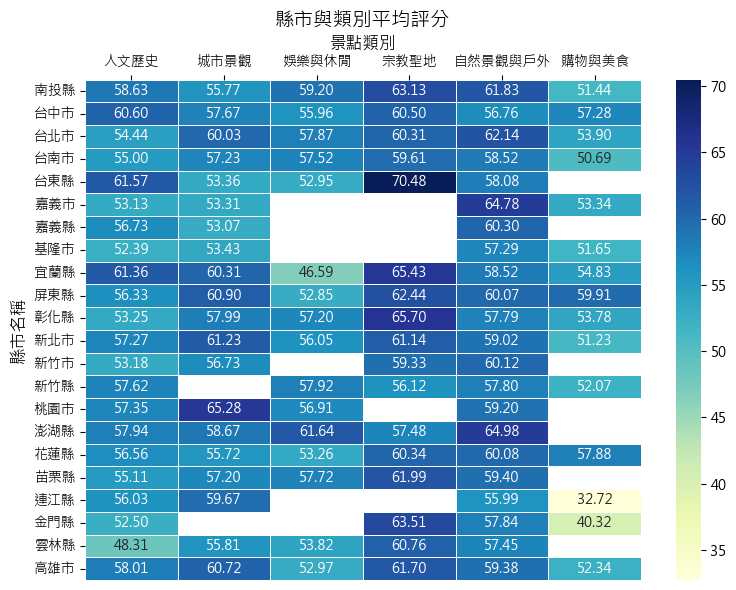

In [58]:
# 繪製熱力圖
plt.figure(figsize=(8, 6))
ax = sns.heatmap(city_type_nlp, cmap="YlGnBu", annot=True, fmt=".2f", linewidths=0.5)

# 讓類別名稱標籤出現在上方
ax.xaxis.set_label_position("top")
ax.xaxis.tick_top()

plt.xticks(rotation=0)
plt.title("縣市與類別平均評分",fontsize=14)
plt.ylabel("縣市名稱",fontsize=12)
plt.xlabel("景點類別",fontsize=12)
plt.tight_layout()
plt.show()

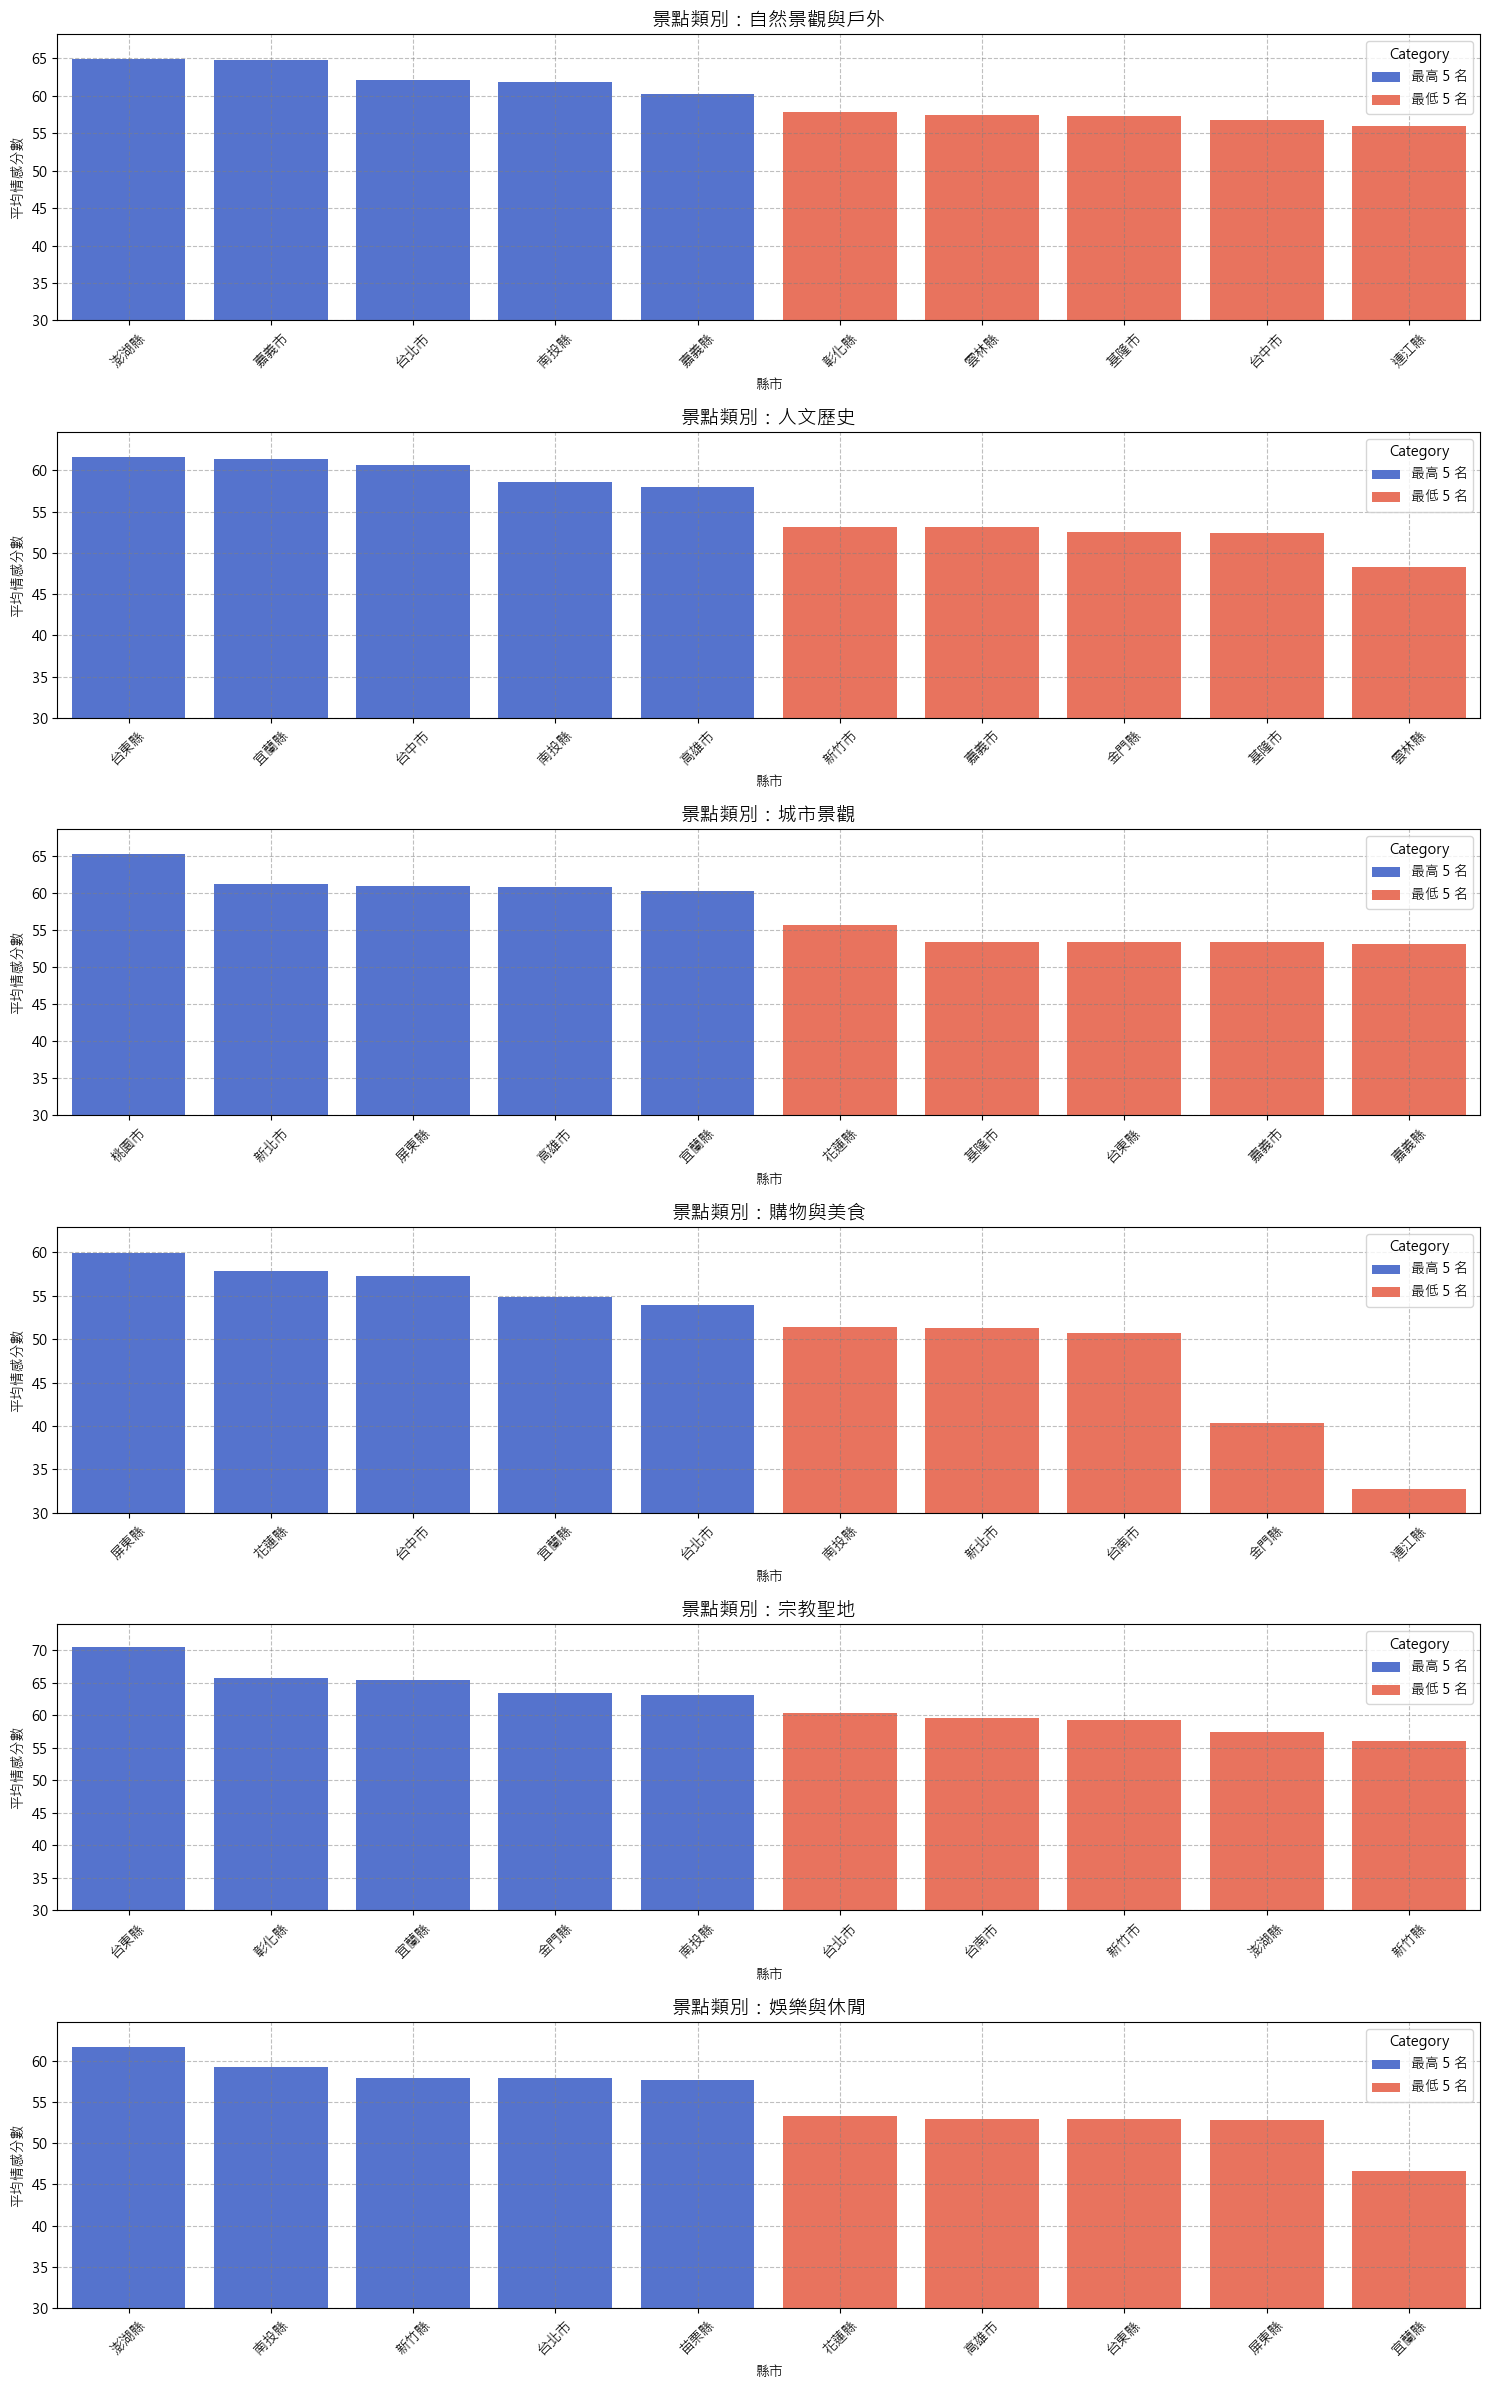

In [59]:
# 使用子圖的方式 只取最高和最低n名

n = 5

# 地點類別數量
categories = new_basic_info_avg_rating_count_838["attraction_type"].unique()
num_categories = len(categories)

# 設定子圖的行數與列數
fig, axes = plt.subplots(nrows=num_categories, ncols=1, figsize=(15, 4 * num_categories))

# 繪製每個地點類別的圖
for ax, category in zip(axes, categories):
    
    # 先算出平均
    df_avg = new_basic_info_avg_rating_count_838.groupby(["address", "attraction_type"], as_index=False)["avg_nlp"].mean()

    # 篩選出該類別的數據
    df_category = df_avg[df_avg["attraction_type"] == category]
    
    # 取最高 n 名
    df_top_n = df_category[df_category["avg_nlp"] >= df_category["avg_nlp"].nlargest(n).min()].sort_values('avg_nlp',ascending=False)
    df_top_n["Category"] = f"最高 {n} 名"

    # 取最低 n 名
    df_bottom_n = df_category[df_category["avg_nlp"] <= df_category["avg_nlp"].nsmallest(n).max()].sort_values('avg_nlp',ascending=False)
    df_bottom_n["Category"] = f"最低 {n} 名"

    df_combined = pd.concat([df_top_n, df_bottom_n])
    
    sns.barplot(
        data=df_combined,
        x="address",
        y="avg_nlp",
        hue="Category",
        ax=ax,
        ci=None,
        palette={f"最高 {n} 名": "royalblue", f"最低 {n} 名": "tomato"}
    )
    ax.set_title(f"景點類別：{category}", fontsize=14) 
    ax.set_xlabel("縣市") 
    ax.set_ylabel("平均情感分數") 
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45) 
    ax.grid(linestyle='--',color='gray', alpha=0.5)
    ax.set_ylim(30, )

# 調整子圖間距
plt.tight_layout()
plt.show()

### 縣市與類別景點數量

In [60]:
# 縣市與類別的評分數量樞紐分析
city_type_count = new_basic_info_avg_rating_count_838.pivot_table('avg_score', index='address', columns='attraction_type', aggfunc='count')
city_type_count

attraction_type,人文歷史,城市景觀,娛樂與休閒,宗教聖地,自然景觀與戶外,購物與美食
address,,,,,,
南投縣,17.0,3.0,10.0,3.0,19.0,3.0
台中市,12.0,5.0,7.0,2.0,16.0,3.0
台北市,28.0,8.0,4.0,12.0,7.0,13.0
台南市,18.0,3.0,8.0,9.0,17.0,1.0
台東縣,7.0,4.0,8.0,1.0,25.0,NaN
嘉義市,3.0,1.0,NaN,NaN,5.0,1.0
嘉義縣,5.0,4.0,NaN,NaN,16.0,NaN
基隆市,8.0,2.0,NaN,NaN,8.0,1.0
宜蘭縣,6.0,1.0,4.0,2.0,15.0,1.0


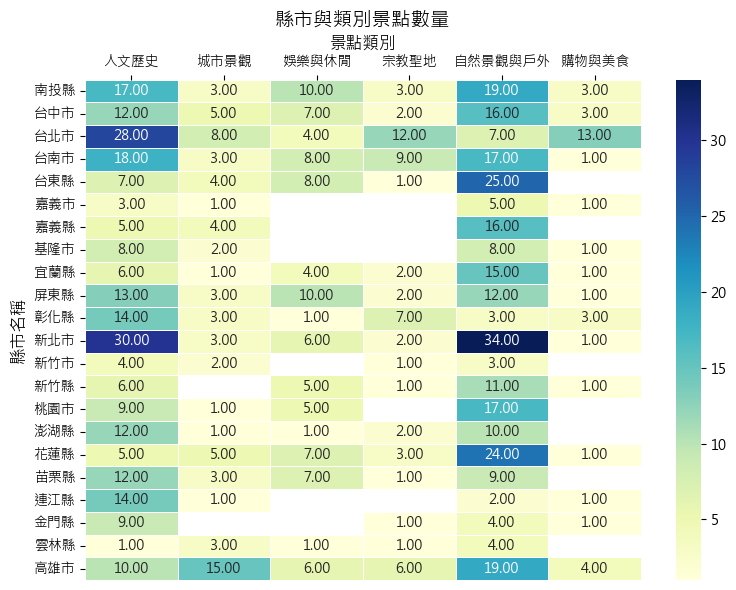

In [61]:
# 繪製熱力圖
plt.figure(figsize=(8, 6))
ax = sns.heatmap(city_type_count, cmap="YlGnBu", annot=True, fmt=".2f", linewidths=0.5)

# 讓類別名稱標籤出現在上方
ax.xaxis.set_label_position("top")
ax.xaxis.tick_top()

plt.xticks(rotation=0)
plt.title("縣市與類別景點數量",fontsize=14)
plt.ylabel("縣市名稱",fontsize=12)
plt.xlabel("景點類別",fontsize=12)
plt.tight_layout()
plt.show()

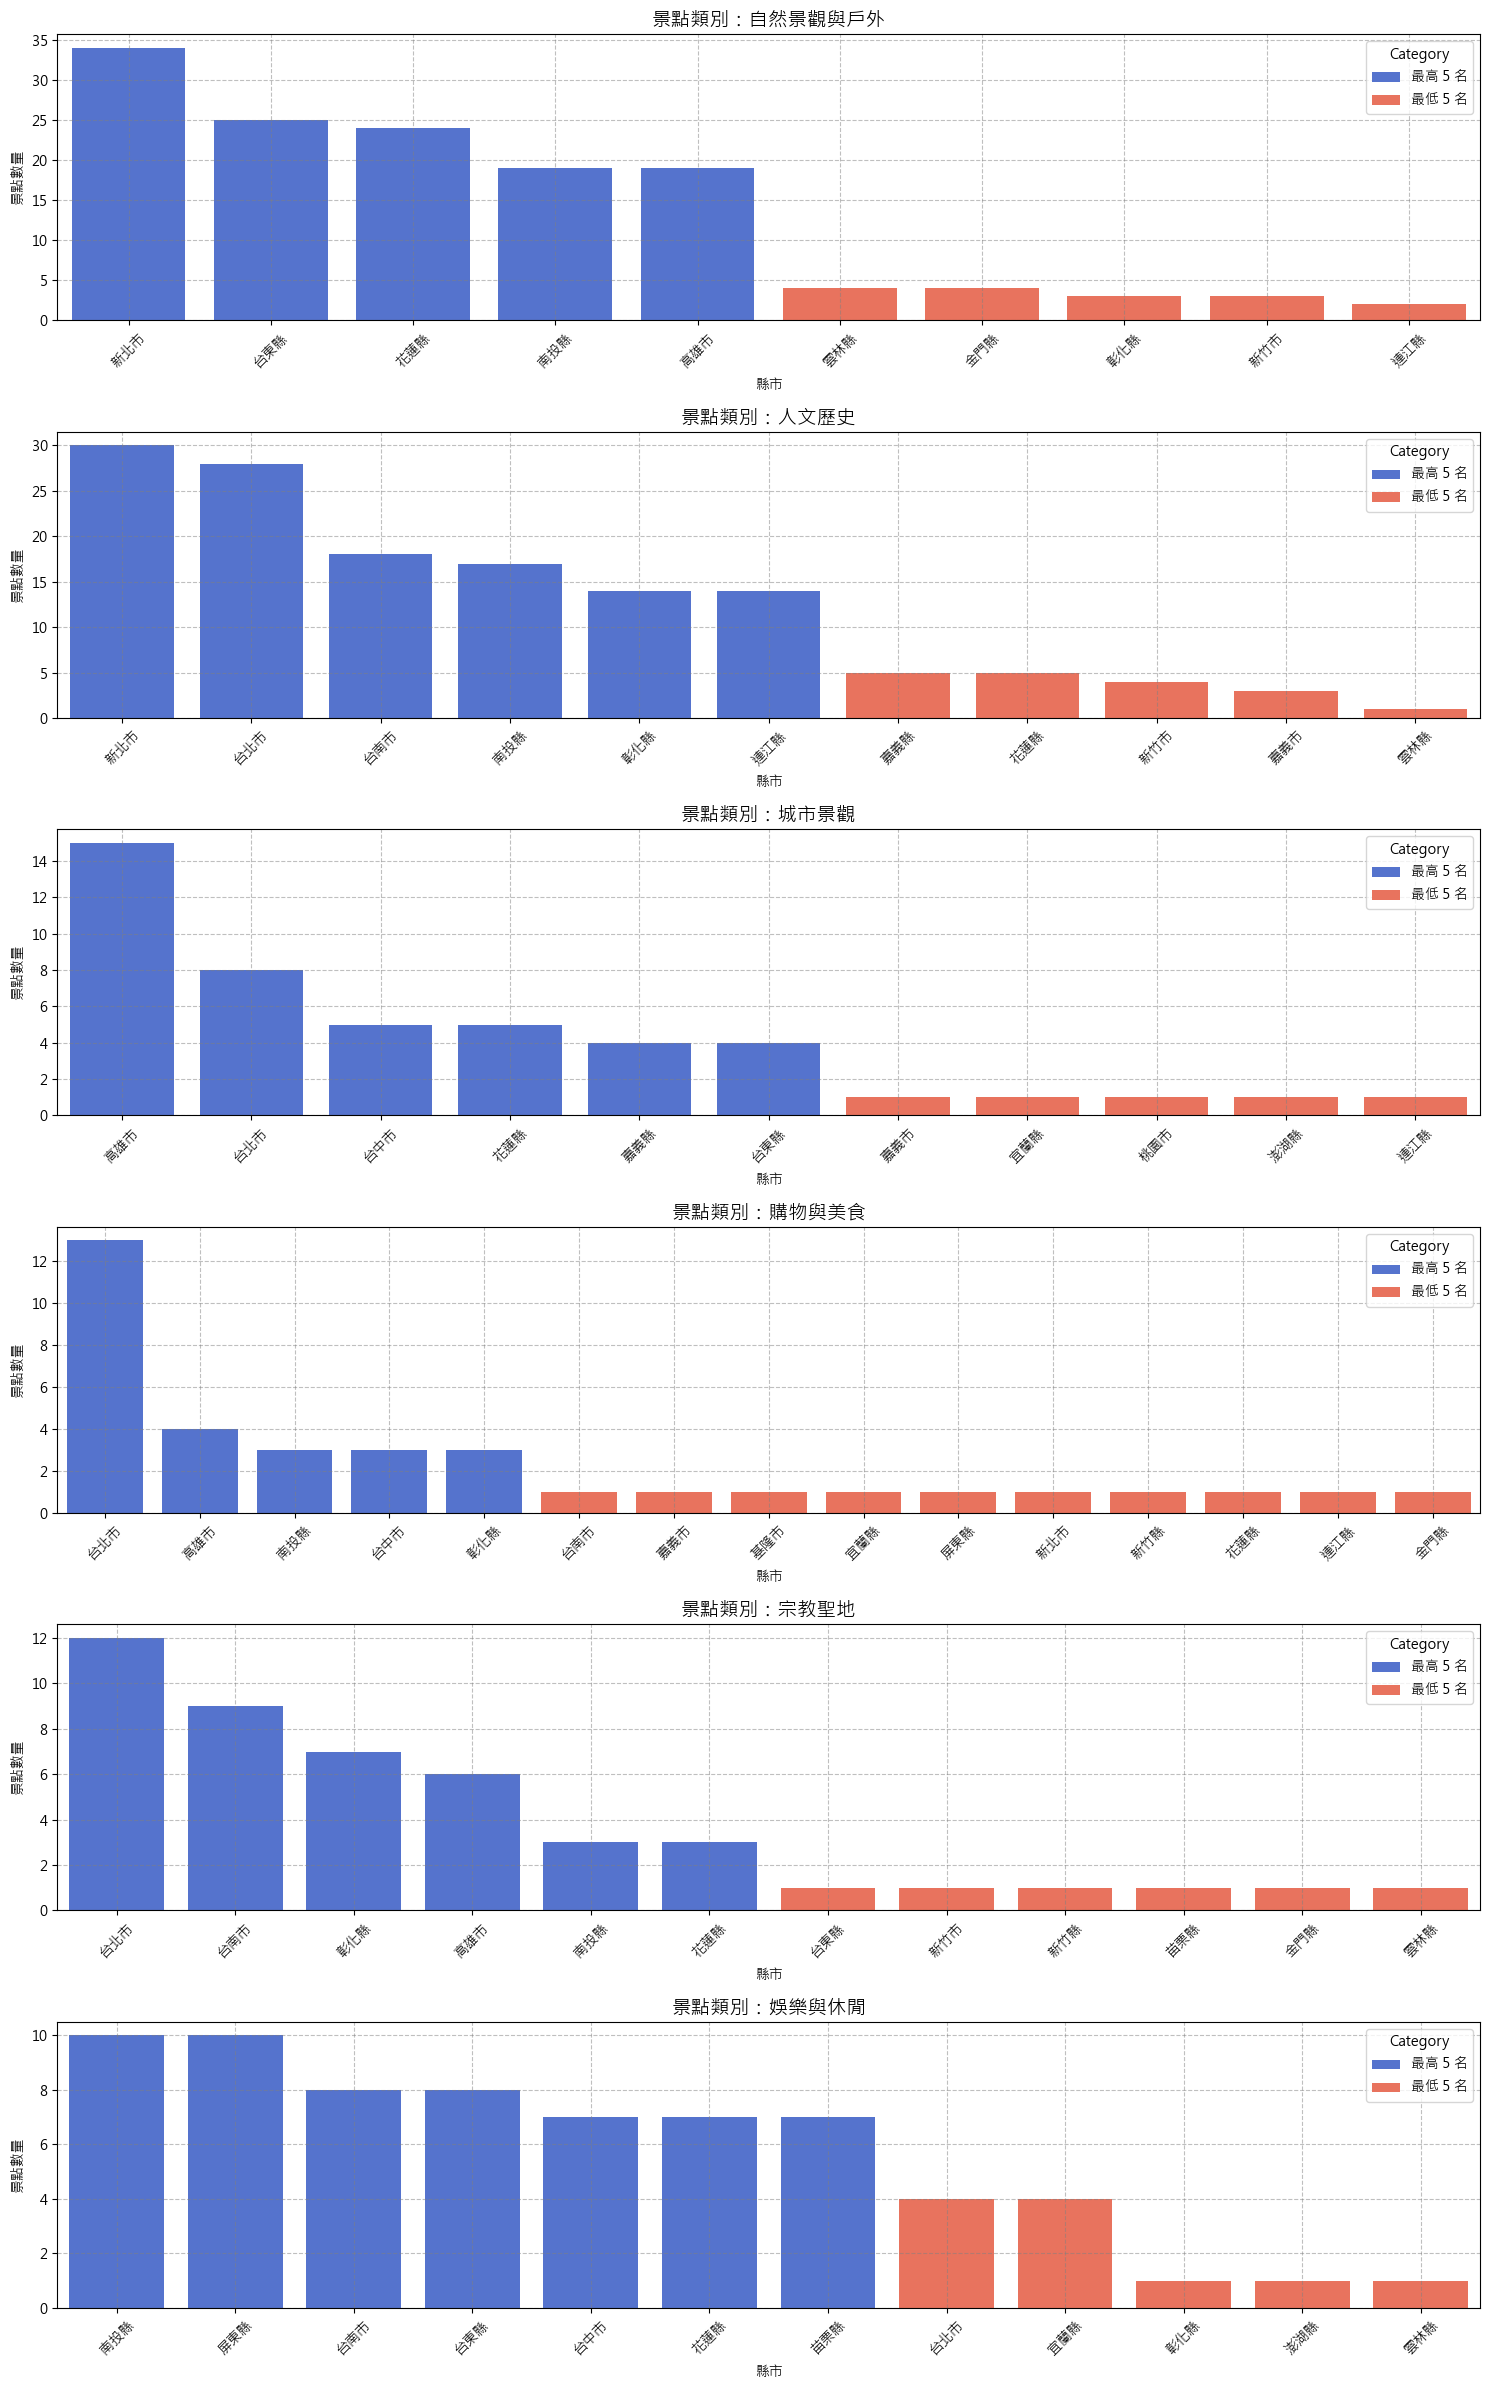

In [62]:
# 使用子圖的方式 只取最高和最低n名

n = 5

# 地點類別數量
categories = new_basic_info_avg_rating_count_838["attraction_type"].unique()
num_categories = len(categories)

# 設定子圖的行數與列數
fig, axes = plt.subplots(nrows=num_categories, ncols=1, figsize=(15, 4 * num_categories))

# 繪製每個地點類別的圖
for ax, category in zip(axes, categories):
    
    # 先算出數量
    df_avg = new_basic_info_avg_rating_count_838.groupby(["address", "attraction_type"], as_index=False)["avg_score"].count()

    # 篩選出該類別的數據
    df_category = df_avg[df_avg["attraction_type"] == category]
    
    # 取最高 n 名
    df_top_n = df_category[df_category["avg_score"] >= df_category["avg_score"].nlargest(n).min()].sort_values('avg_score',ascending=False)
    df_top_n["Category"] = f"最高 {n} 名"

    # 取最低 n 名
    df_bottom_n = df_category[df_category["avg_score"] <= df_category["avg_score"].nsmallest(n).max()].sort_values('avg_score',ascending=False)
    df_bottom_n["Category"] = f"最低 {n} 名"

    df_combined = pd.concat([df_top_n, df_bottom_n])
    
    sns.barplot(
        data=df_combined,
        x="address",
        y="avg_score",
        hue="Category",
        ax=ax,
        ci=None,
        palette={f"最高 {n} 名": "royalblue", f"最低 {n} 名": "tomato"}
    )
    ax.set_title(f"景點類別：{category}", fontsize=14)
    ax.set_xlabel("縣市")  
    ax.set_ylabel("景點數量")  
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.grid(linestyle='--',color='gray', alpha=0.5)

# 調整子圖間距
plt.tight_layout()
plt.show()

## 輸出成Excel檔

In [63]:
# # 輸出成xlsx檔
# dfs = {
#     "低於100則評分數的景點縣市分布": city_counts_under_100,
#     "各縣市景點總數": city_counts,
#     "各縣市平均評分": city_groups,
#     "各縣市平均情感分數": nlp_city_groups,
#     "各類別景點總數": category_counts,
#     "各類別平均評分": category_groups,
#     "各類別平均情感分數": nlp_category_groups,
#     "前50低平均評分景點": bottom_n,
#     "各縣市評分前50低景點數量": city_rating_bottom_n,
#     "各景點類別評分前50低景點數量": type_rating_bottom_n,
#     "前50高平均評分景點": top_n,
#     "各縣市評分前50高景點數量": city_rating_top_n,
#     "各景點類別評分前50高景點數量": type_rating_top_n,
#     "各縣市平均分數最高前3名": top_per_city,
#     "各縣市平均分數最低前3名": bottom_per_city,
#     "各縣市各類別平均分數最高景點": top_per_city_type,
#     "各縣市各類別平均分數最低景點": bottom_per_city_type,
#     "前50低情感分數景點": nlp_bottom_n,
#     "各縣市情感分數前50低景點數量": city_nlp_bottom_n,
#     "各景點類別情感分數前50低景點數量": type_nlp_bottom_n,
#     "前50高情感分數景點": nlp_top_n,
#     "各縣市情感分數前50高景點數量": city_nlp_top_n,
#     "各景點類別情感分數前50高景點數量": type_nlp_top_n,
#     "各縣市平均情感分數最高前3名": top_nlp_per_city,
#     "各縣市平均情感分數最低前3名": bottom_nlp_per_city,
#     "各縣市各類別平均情感分數最高景點": top_nlp_per_city_type,
#     "各縣市各類別平均情感分數最低景點": bottom_nlp_per_city_type,
#     "縣市與類別平均評分": city_type,
#     "縣市與類別平均情感分數": city_type_nlp,
#     "縣市與類別景點數量": city_type_count
# }

# # 輸出成 Excel，並存到不同的 Sheet
# with pd.ExcelWriter("../data/descriptive_statistic_analysis_all.xlsx") as writer:
#     for sheet_name, df in dfs.items():
#         df.to_excel(writer, sheet_name=sheet_name)

# print("已儲存！")